In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import os
#run from repo root...
os.chdir(r"C:/Users/jamed\Documents/repos/lidar_2/LidarClassifcationForFloodModelling")

In [40]:
from structured_data_utils.data import ModelData
from structured_data_utils.structured_data_interfacing import standardise_dataset


In [41]:
standardise_dataset("WILLOWAN", force=True)

data\WILLOWAN\POSITIVE.tif
data\WILLOWAN\POSITIVE_STANDARDISED.tif
data\WILLOWAN\COMBINED.tif
data\WILLOWAN\COMBINED_STANDARDISED.tif


In [42]:
willowan_data = ModelData()
willowan_data.prepare_data("WILLOWAN", sliding_window_size=300, stride=50, test=False)
willowan_data.prepare_train_test()

pad_x: 1320, pad_y: 1028
1257.0
starting
torch.Size([1739, 300, 300])
tensor([0.5788, 0.5963, 0.6050,  ..., 0.7239, 0.7151, 0.7064])
torch.Size([1672, 300, 300])


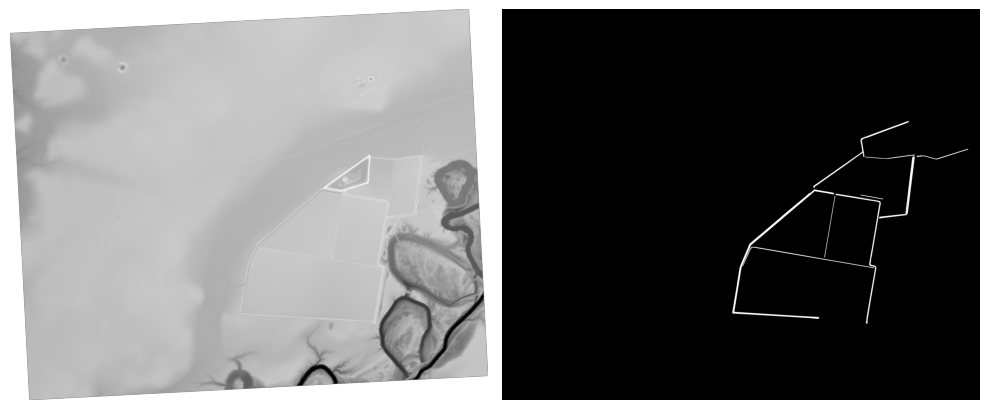

In [43]:
from quick_and_dirty_models.unet_implementation.metrics import show_matrices
show_matrices([willowan_data.data_with_labels.data[0], willowan_data.data_with_labels.labels[0]])

In [44]:
standardise_dataset("BEERMERY", force=True)

data\BEERMERY\POSITIVE.tif
data\BEERMERY\POSITIVE_STANDARDISED.tif
data\BEERMERY\COMBINED.tif
data\BEERMERY\COMBINED_STANDARDISED.tif


In [45]:
beermery_data = ModelData()
beermery_data.prepare_data("BEERMERY", sliding_window_size=300, stride=100)
beermery_data.prepare_train_test()

pad_x: 675, pad_y: 532
562.0
starting
torch.Size([2870, 300, 300])
tensor([0.0000, 0.0000, 0.0000,  ..., 0.1129, 0.0954, 0.0780])
torch.Size([2625, 300, 300])


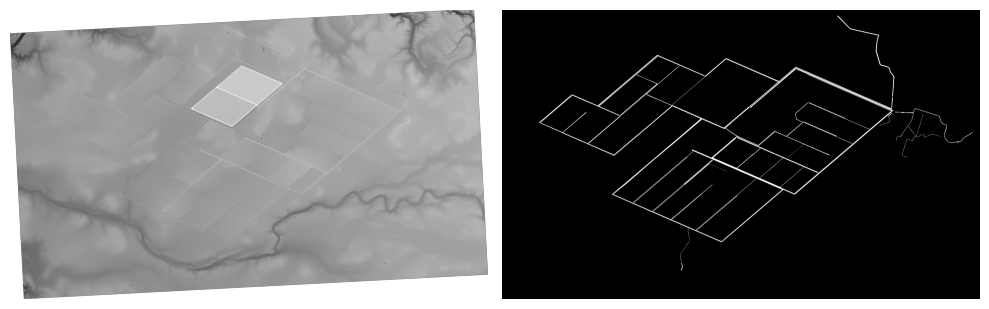

In [46]:
from quick_and_dirty_models.unet_implementation.metrics import show_matrices
show_matrices([beermery_data.data_with_labels.data[0], beermery_data.data_with_labels.labels[0]])

In [47]:
combined_data = ModelData.splice_model_data([beermery_data, willowan_data])

In [48]:
from quick_and_dirty_models.unet_implementation.modules import train_model, test_model_visual


Epoch 20/700 - loss: 0.1652
lr: 0.0394427551451589


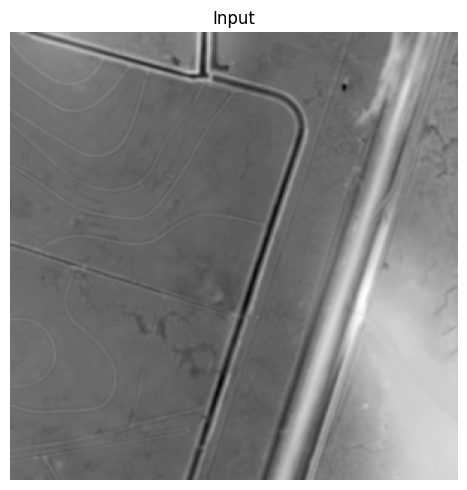

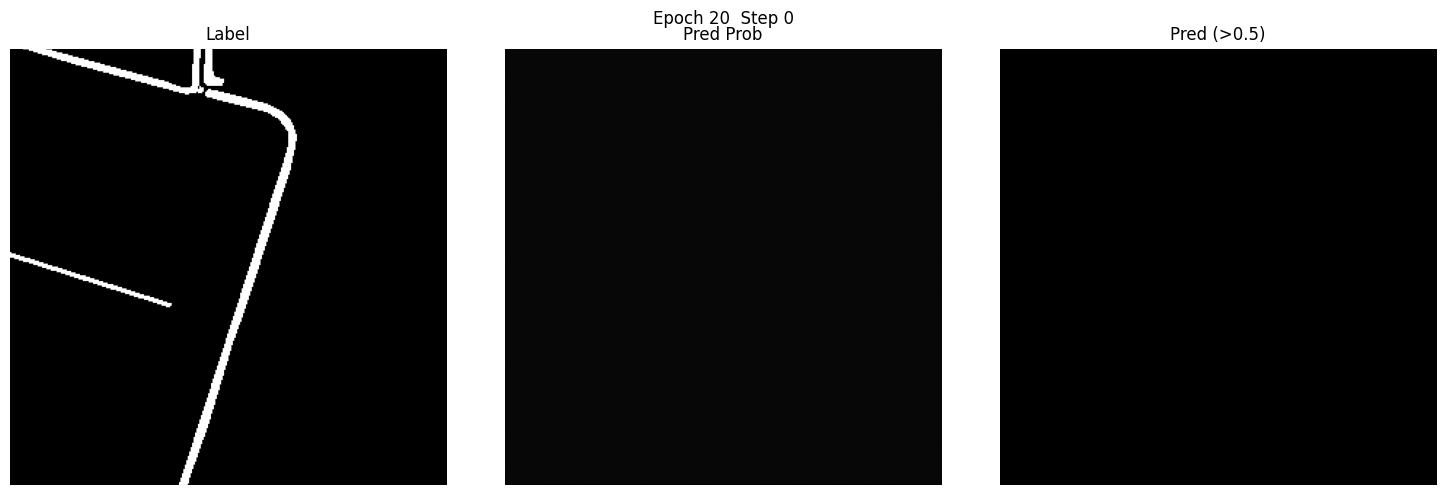

Epoch 40/700 - loss: 0.0460
lr: 0.030132949131853035


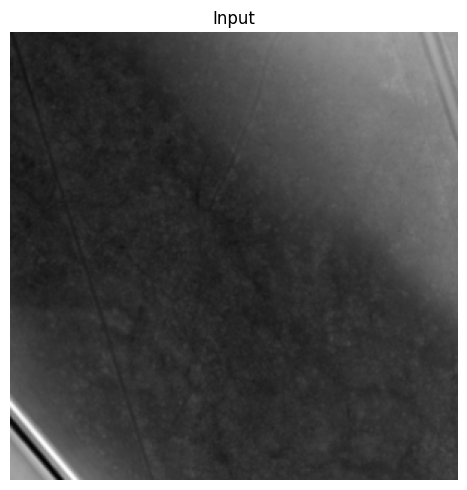

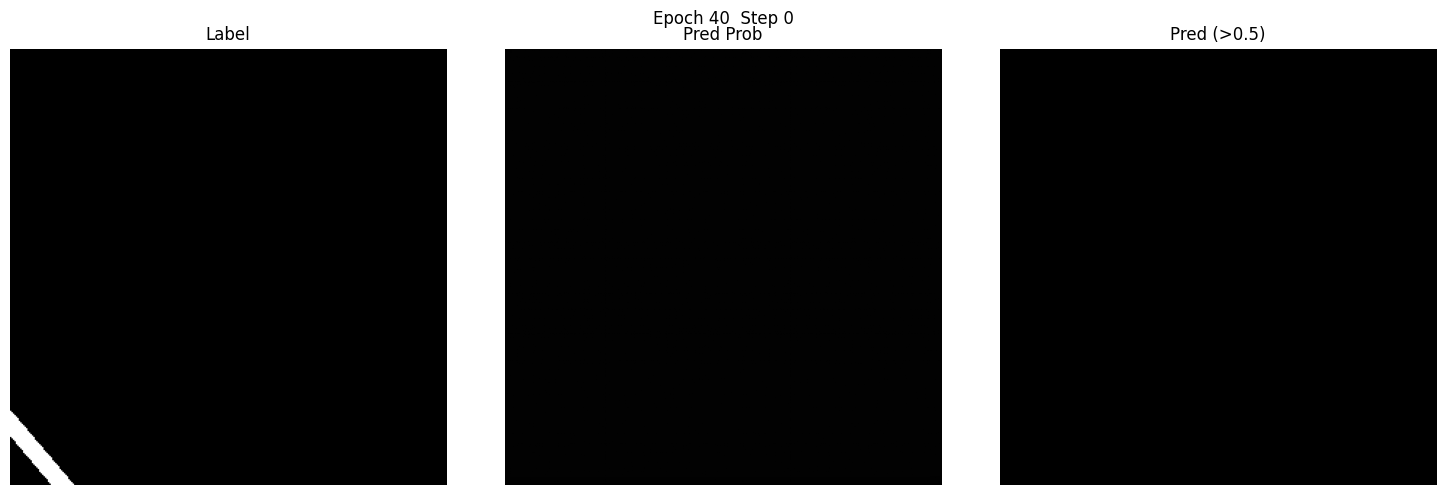

Epoch 60/700 - loss: 0.0247
lr: 0.022510163824502723


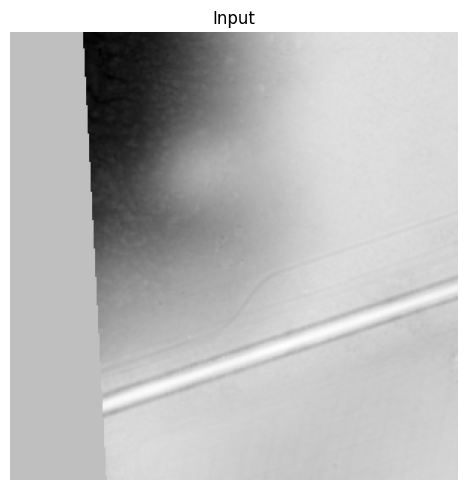

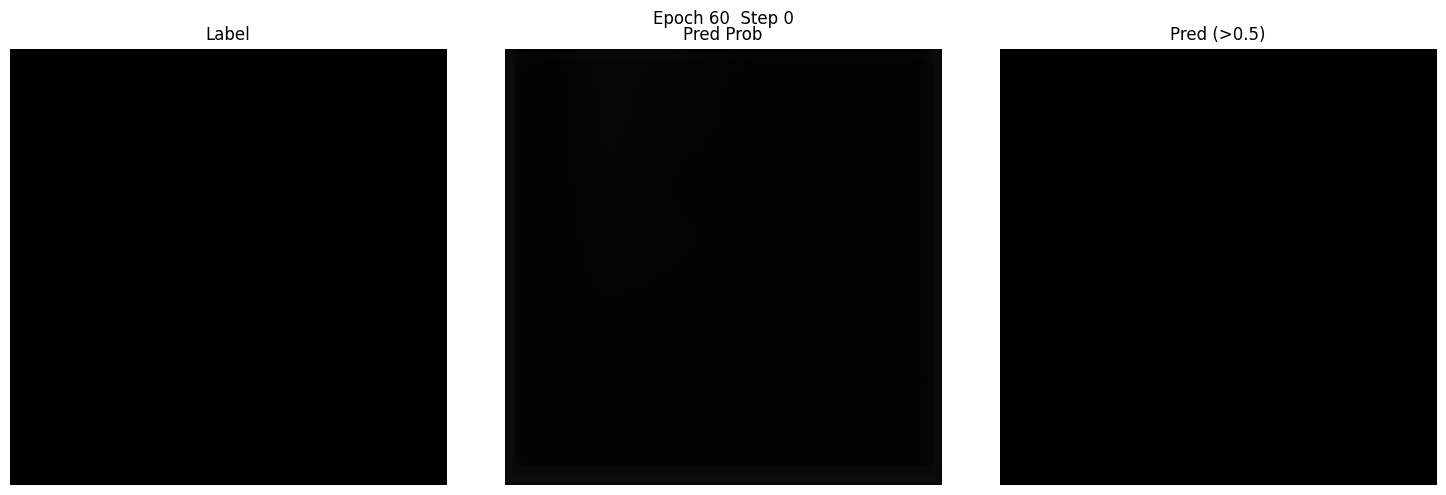

Epoch 80/700 - loss: 0.0804
lr: 0.016412221973957503


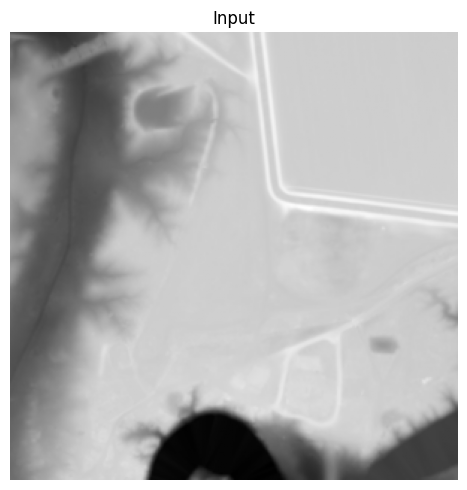

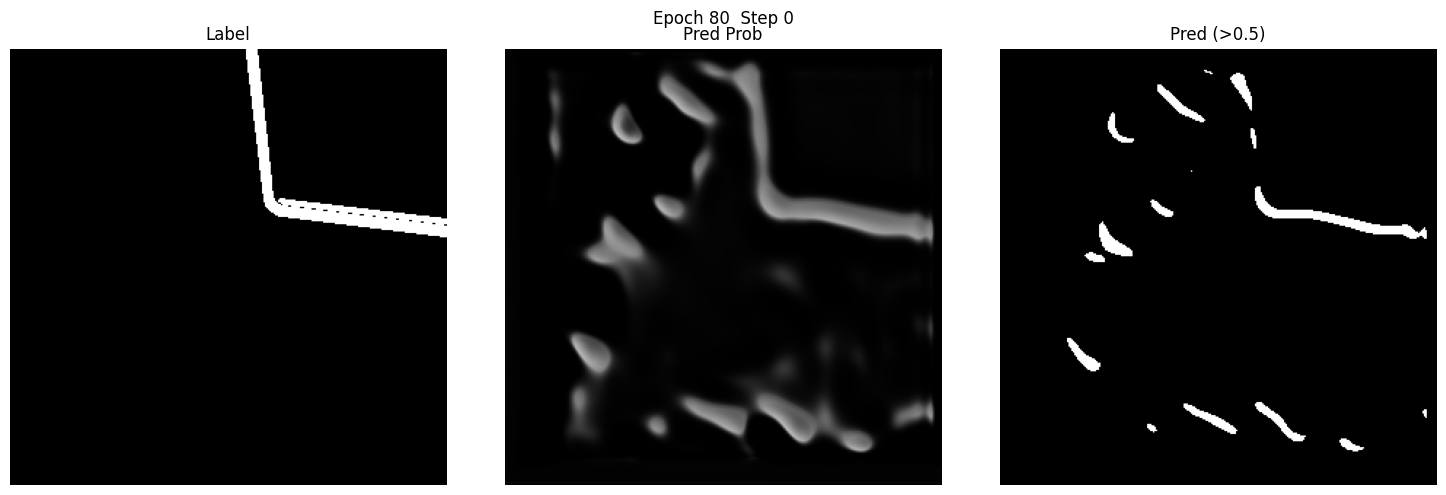

Epoch 100/700 - loss: 0.0169
lr: 0.011655458781401383


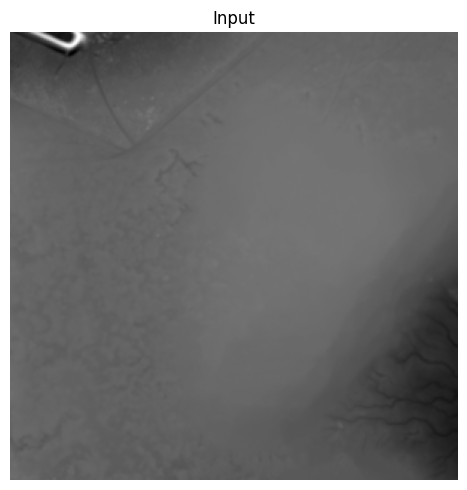

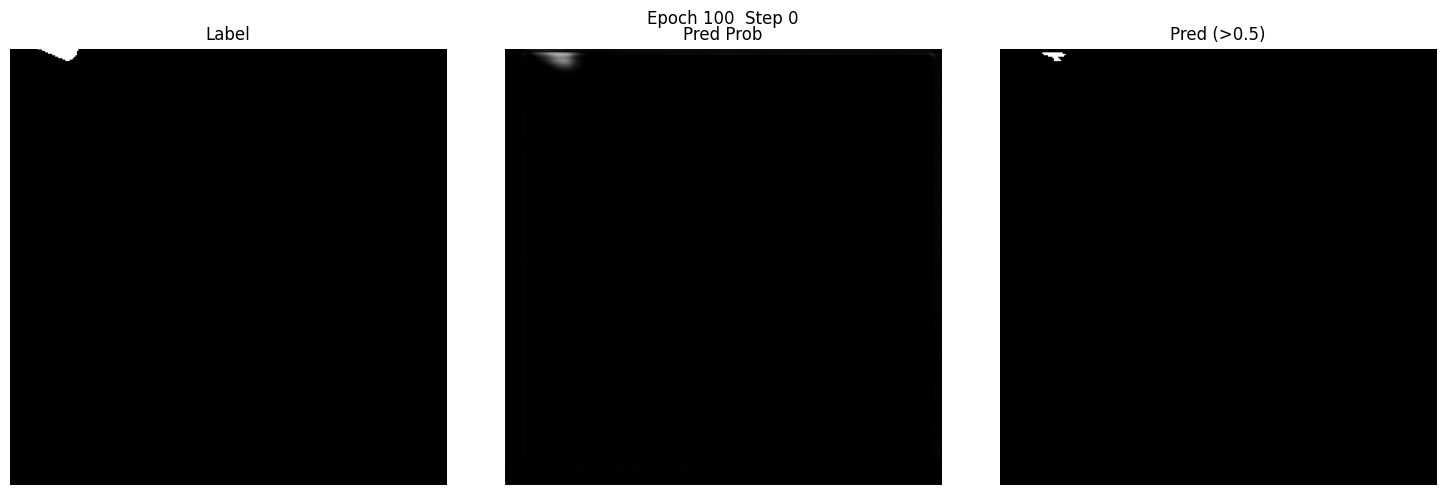

Epoch 120/700 - loss: 0.1177
lr: 0.008044758802225995


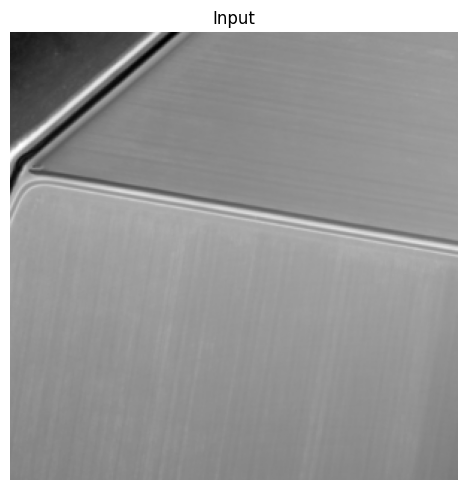

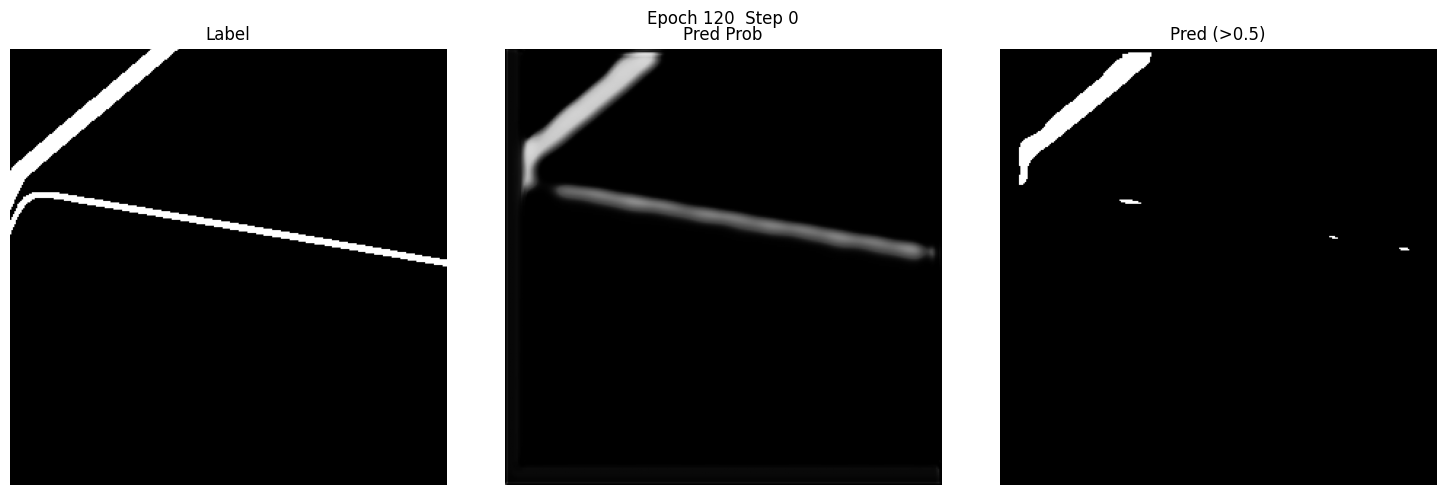

Epoch 140/700 - loss: 0.1812
lr: 0.005383782399608157


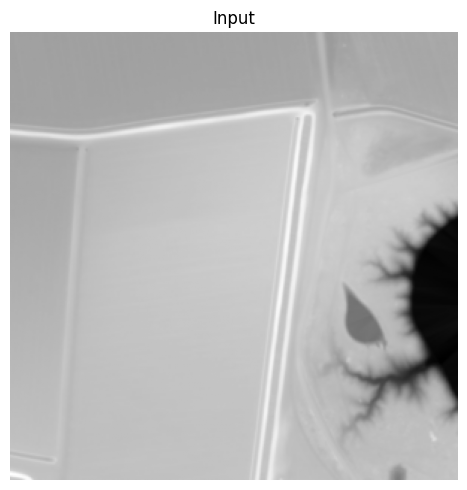

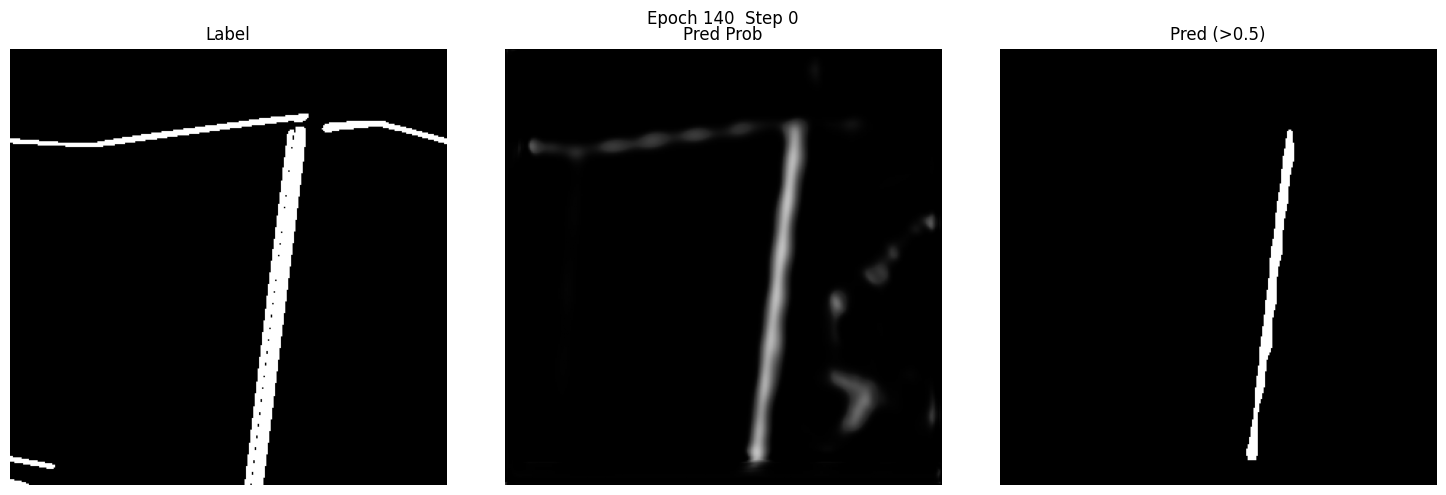

Epoch 160/700 - loss: 0.0253
lr: 0.00348446486431674


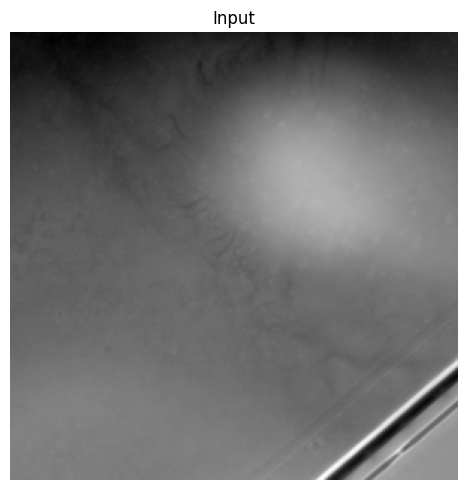

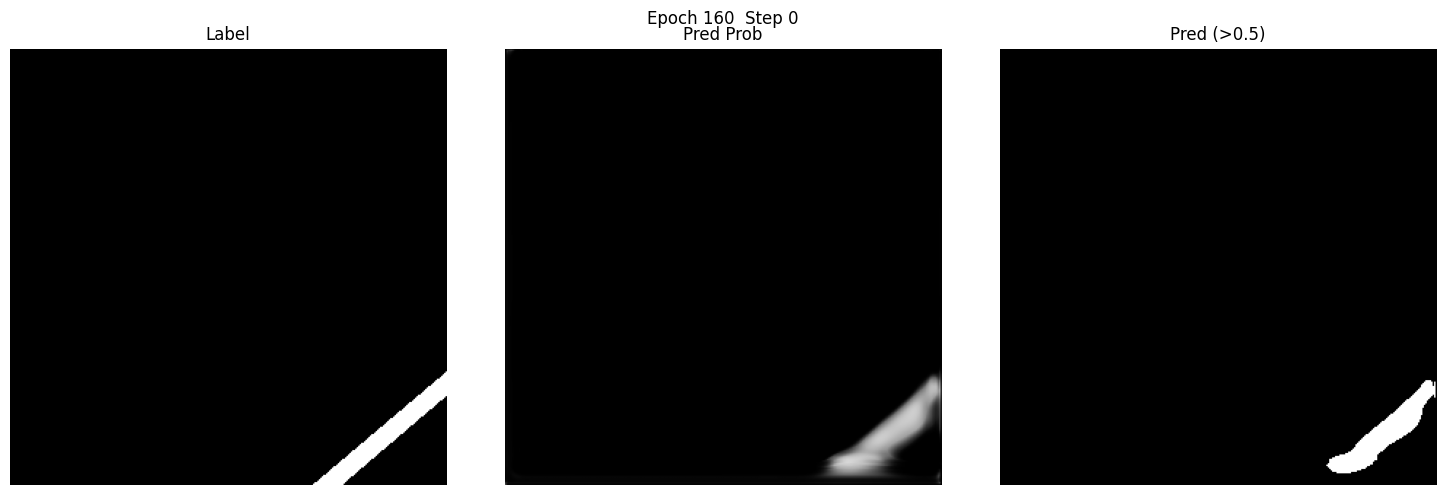

Epoch 180/700 - loss: 0.0835
lr: 0.002174949159060606


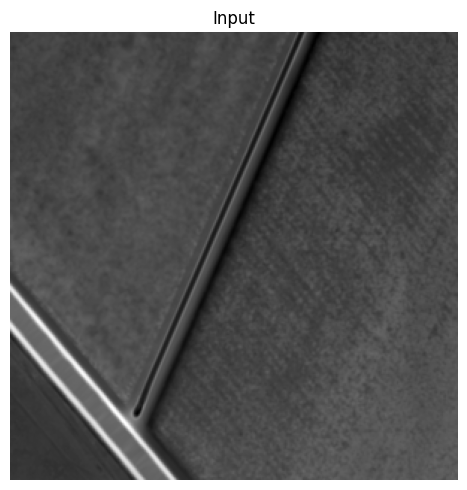

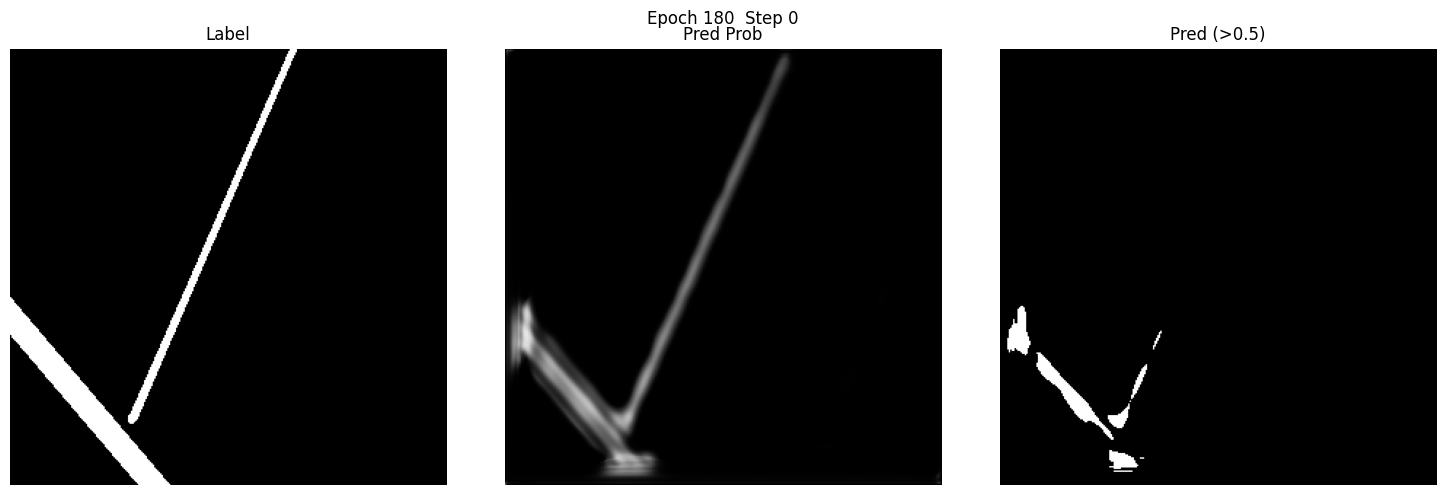

Epoch 200/700 - loss: 0.0352
lr: 0.0013053173919442898


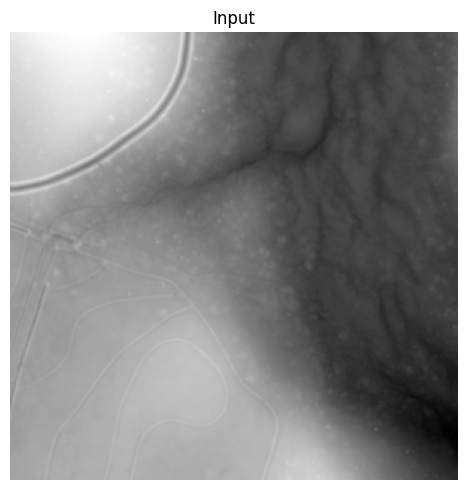

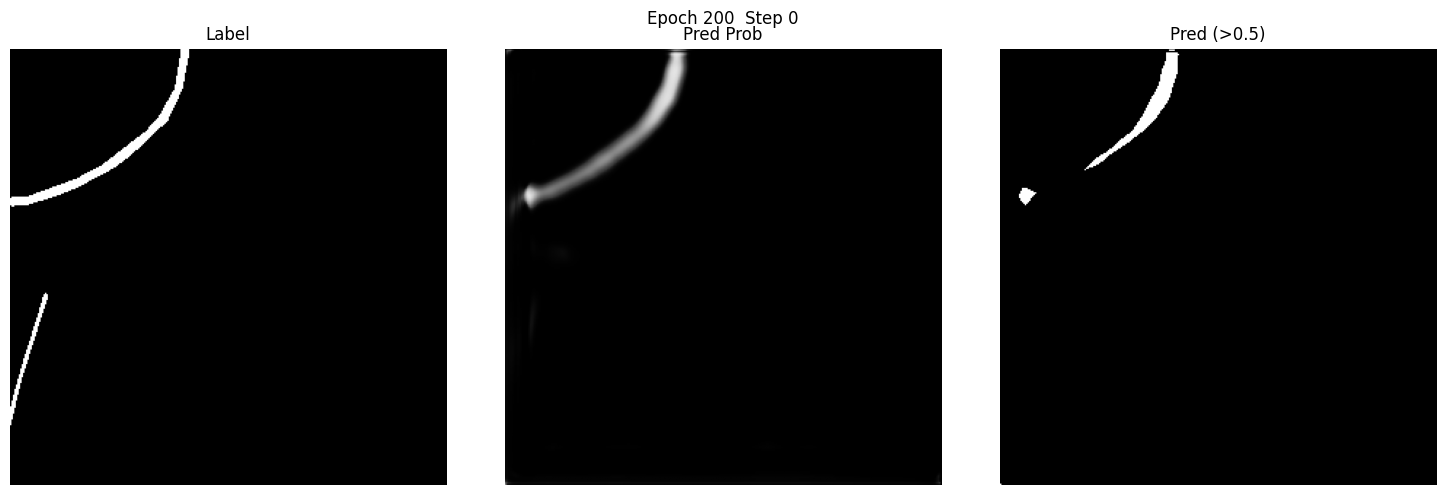

Epoch 220/700 - loss: 0.0330
lr: 0.0007507884291956637


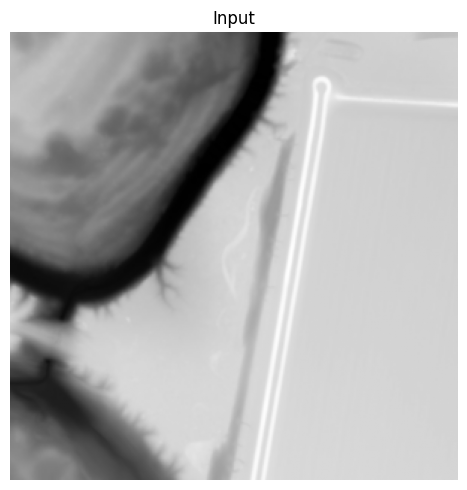

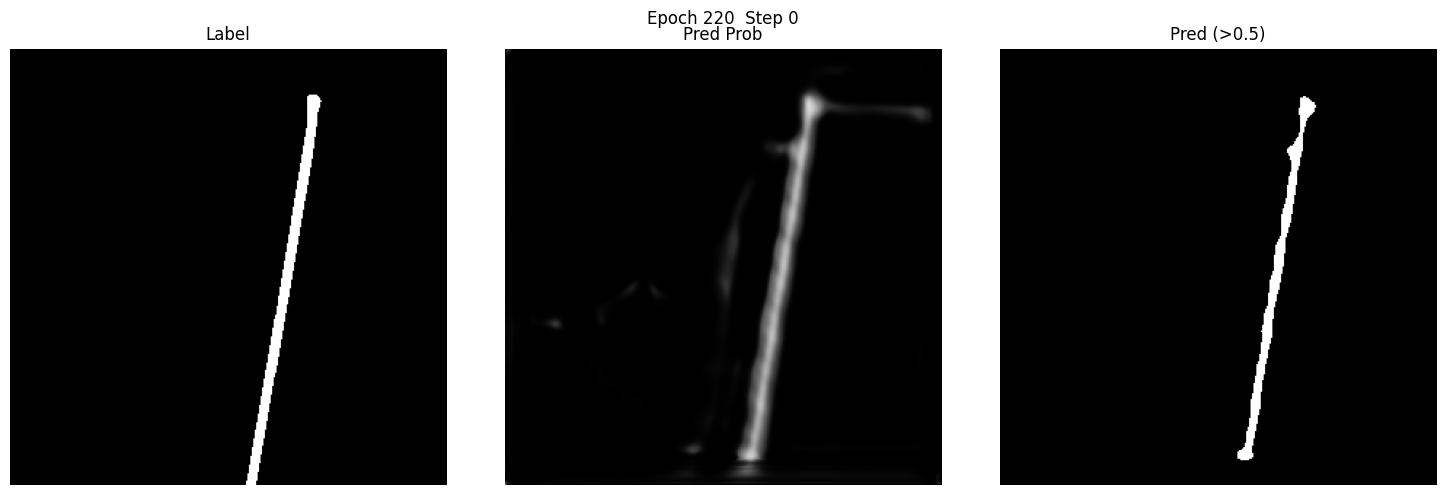

Epoch 240/700 - loss: 0.0447
lr: 0.00041239715950465905


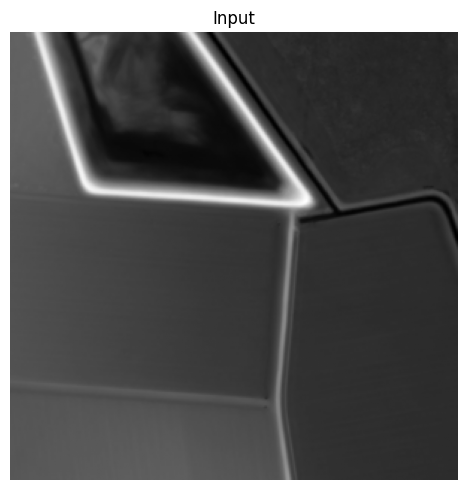

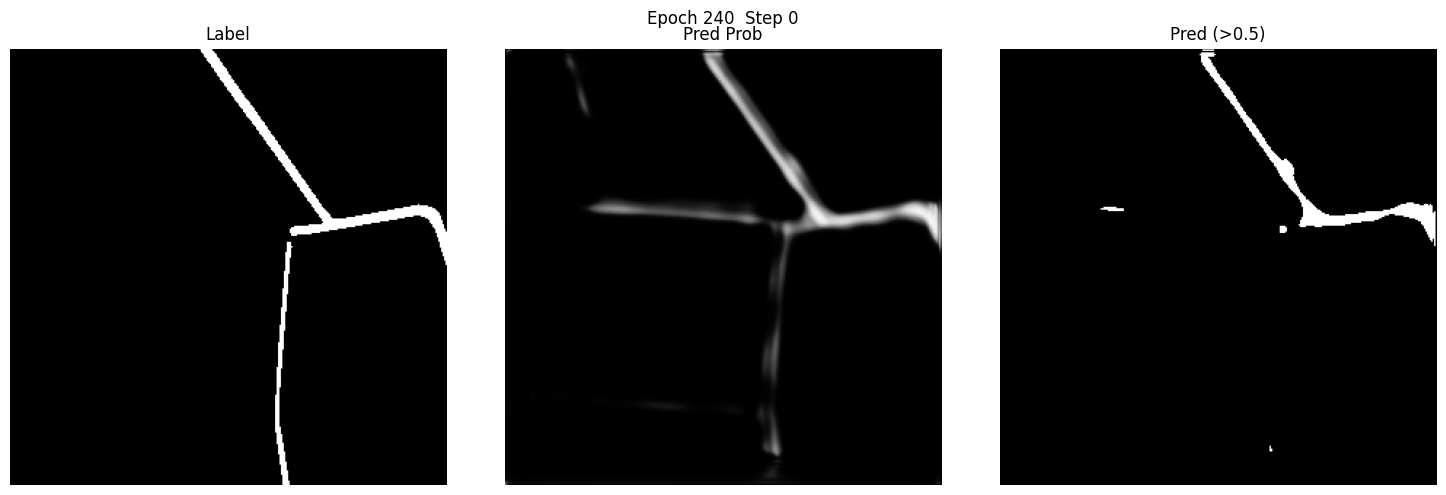

Epoch 260/700 - loss: 0.0528
lr: 0.00021549865340445273


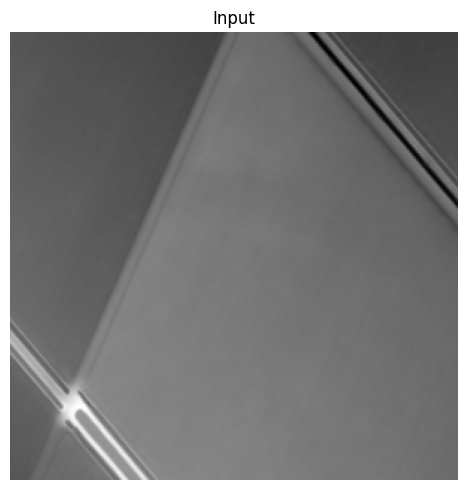

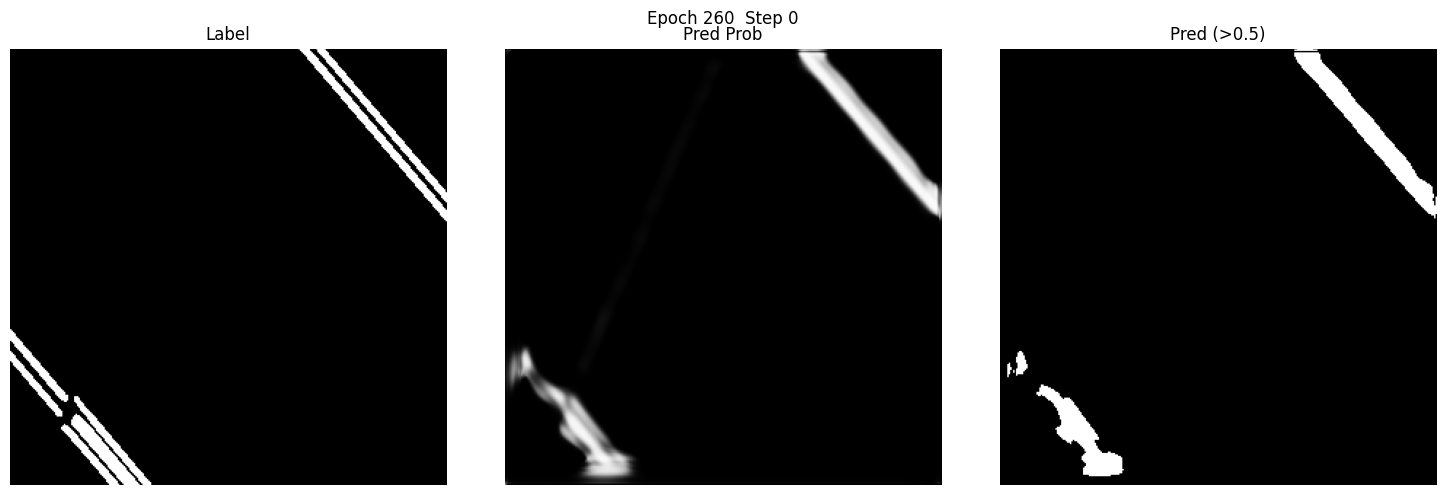

Epoch 280/700 - loss: 0.0487
lr: 0.00010668409582239488


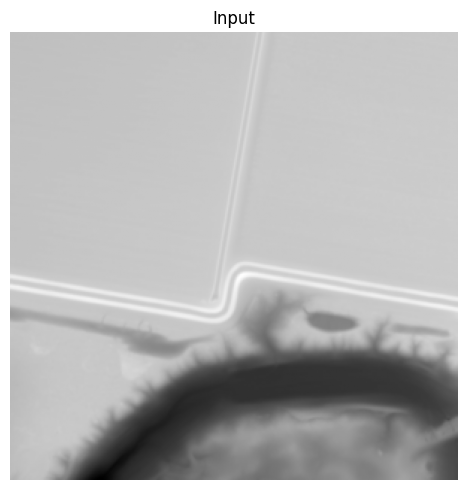

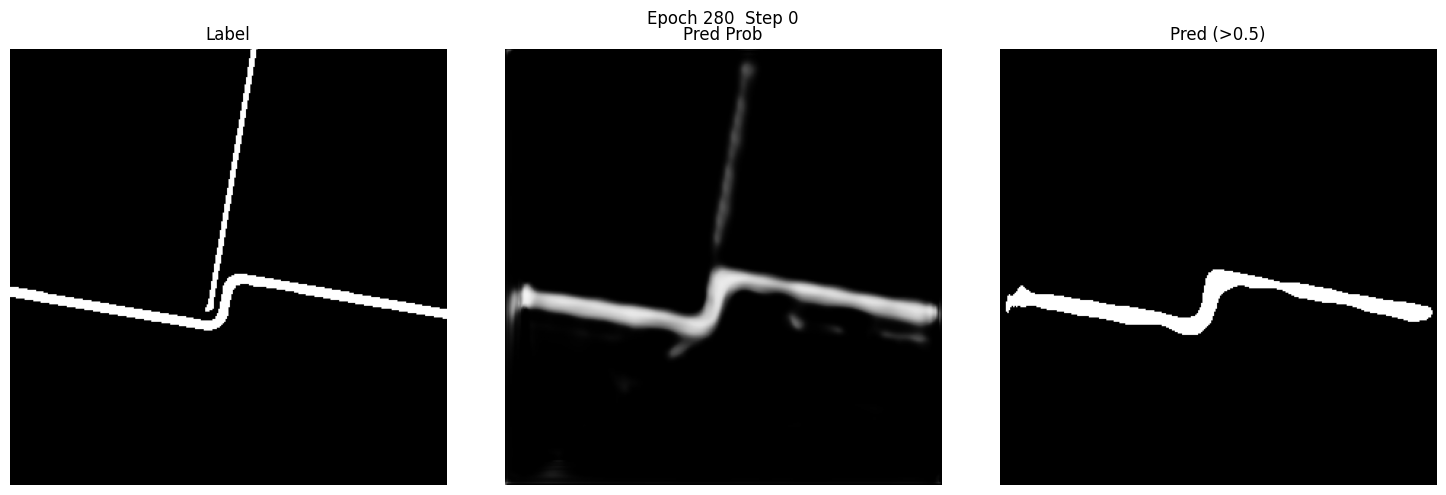

Epoch 300/700 - loss: 0.0415
lr: 4.981110395739801e-05


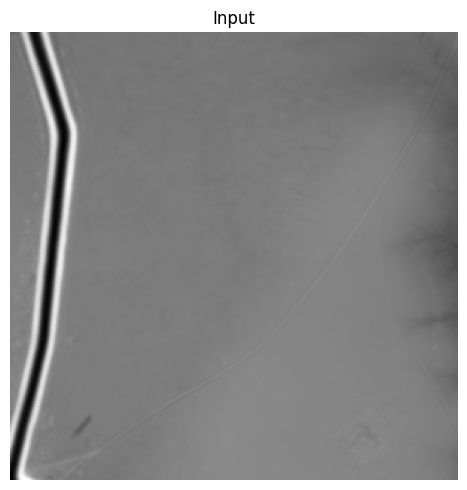

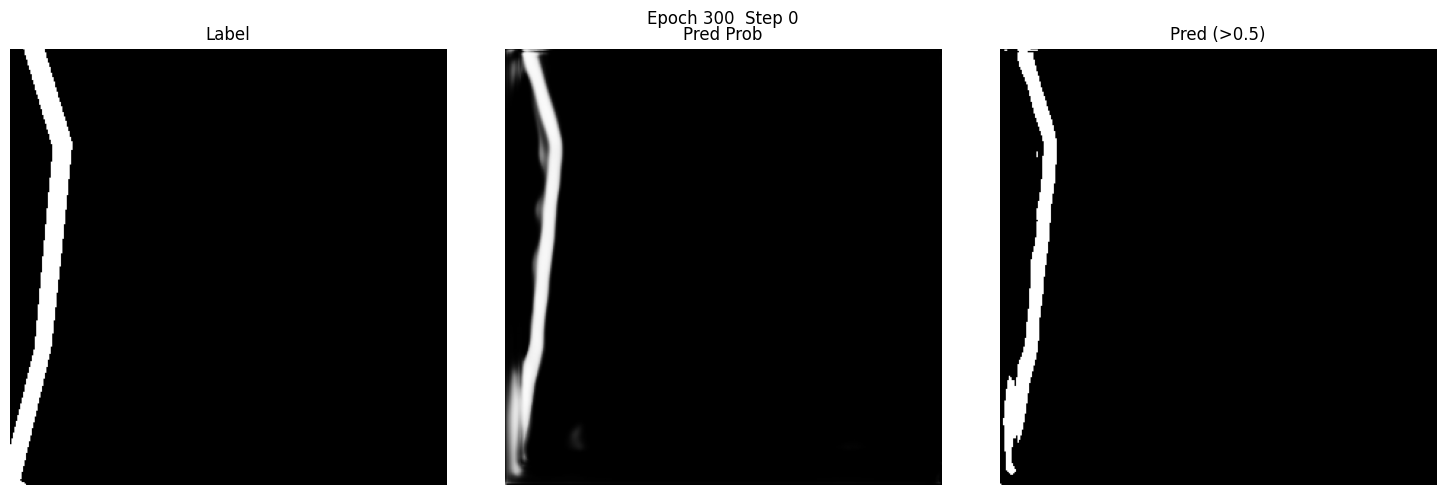

Epoch 320/700 - loss: 0.0386
lr: 2.1827618943968404e-05


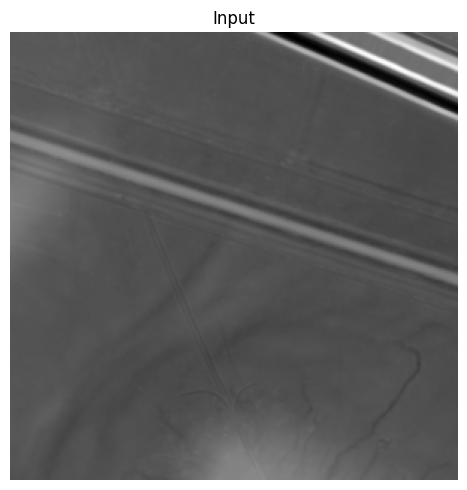

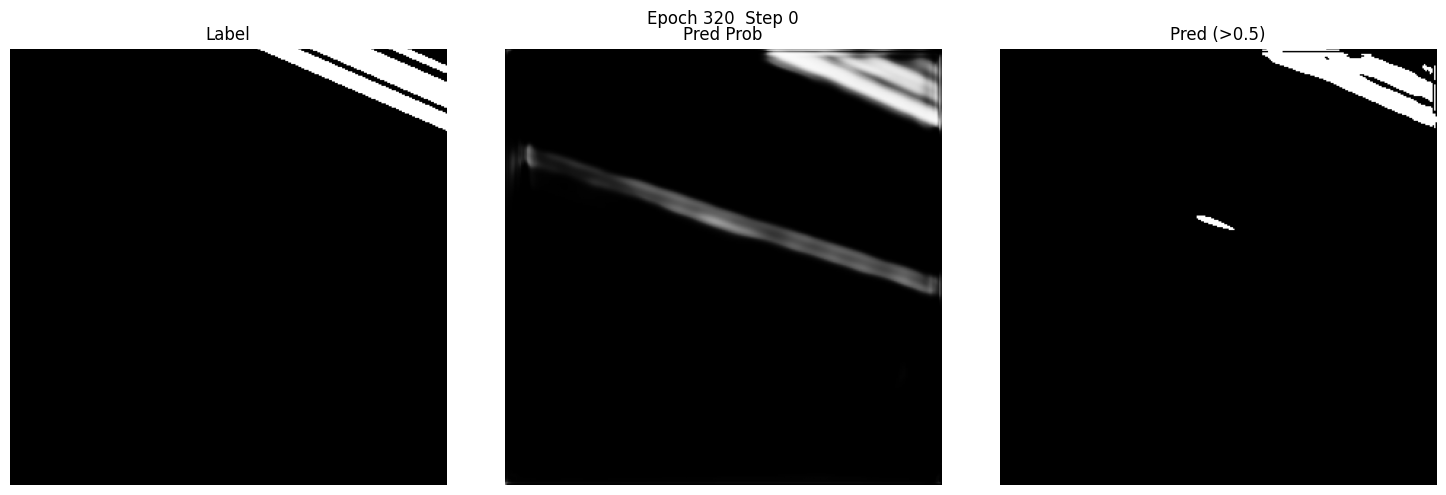

Epoch 340/700 - loss: 0.0699
lr: 8.929893080965906e-06


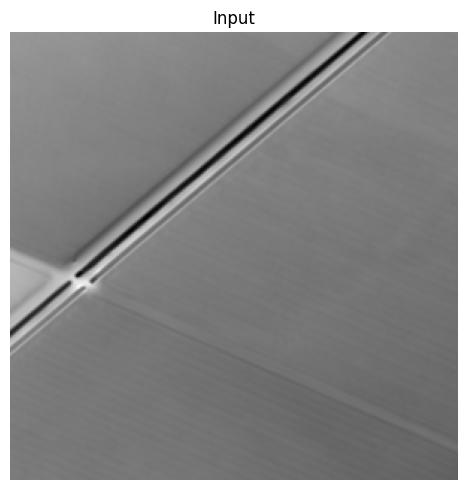

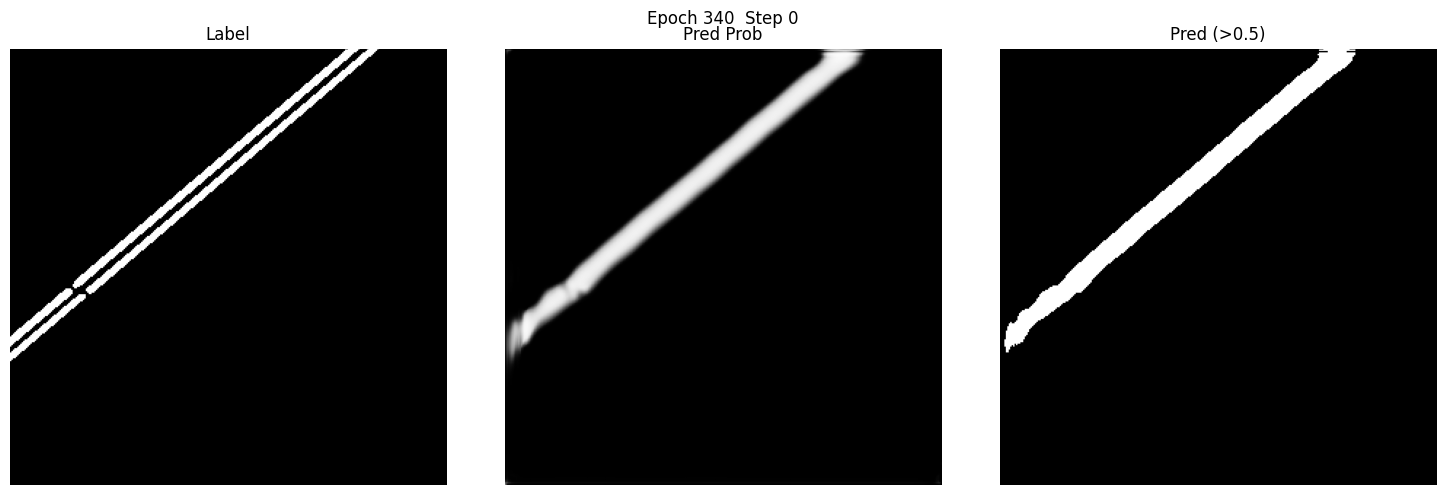

Epoch 360/700 - loss: 0.0016
lr: 3.391257764951464e-06


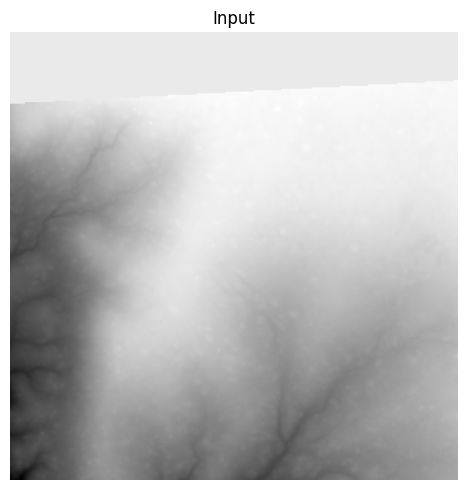

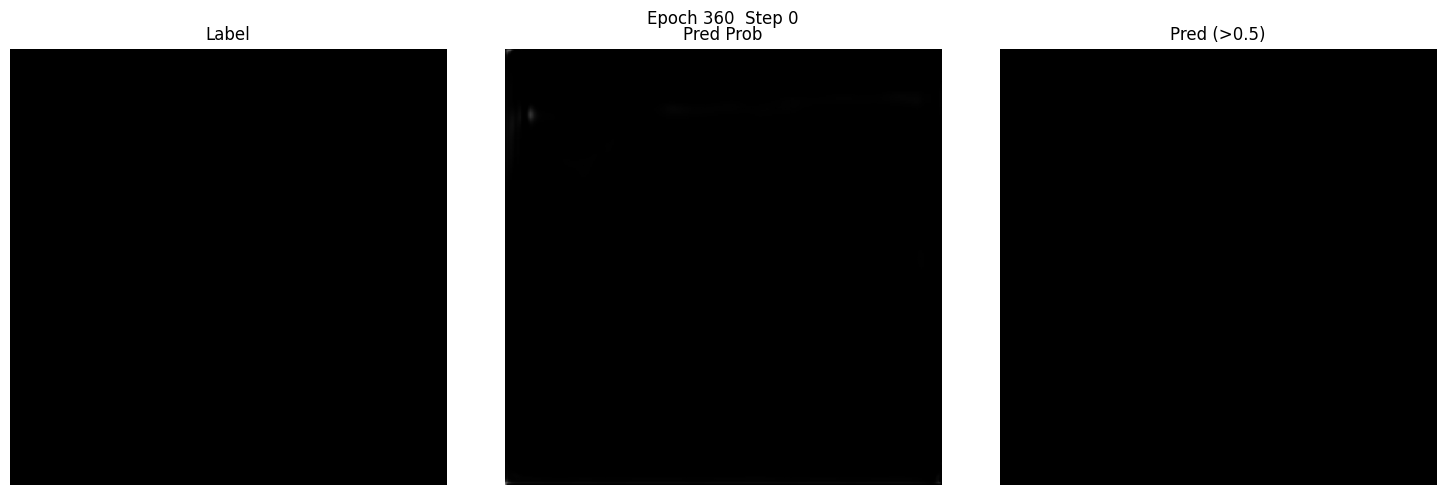

Epoch 380/700 - loss: 0.0592
lr: 1.1881136517435475e-06


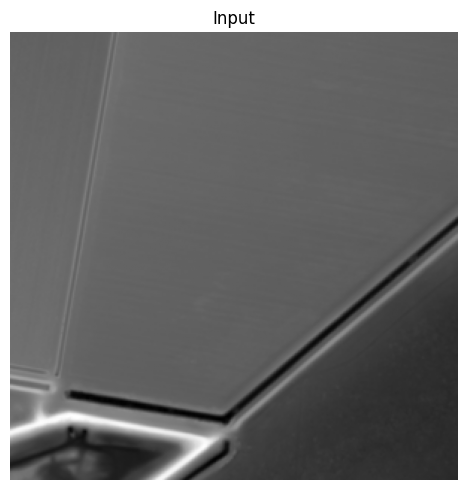

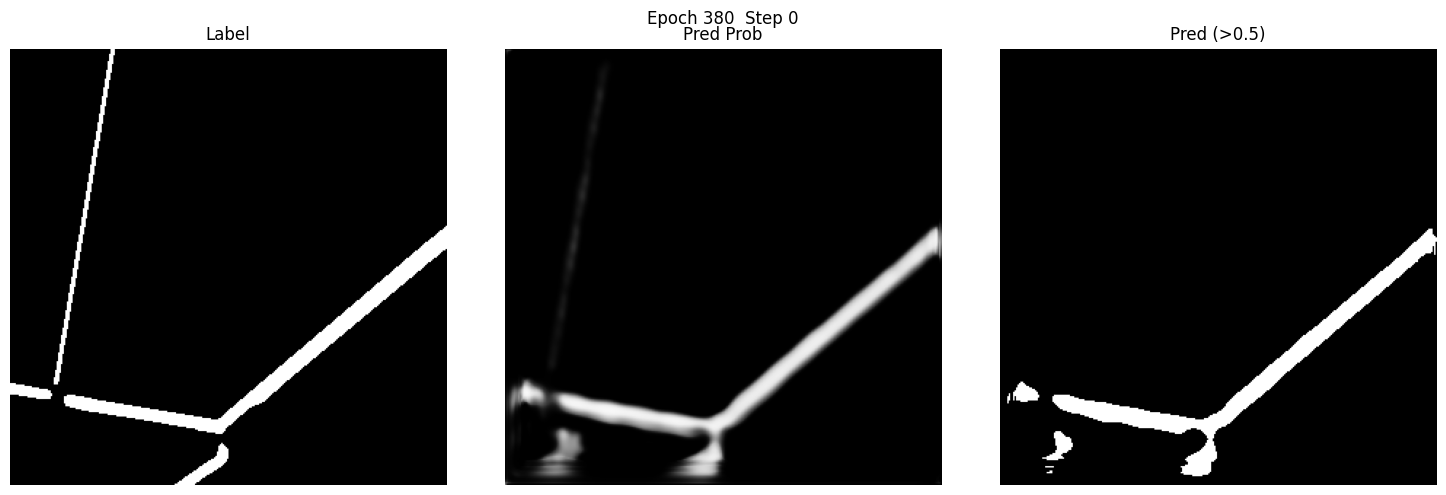

Epoch 400/700 - loss: 0.0586
lr: 3.8143595144906387e-07


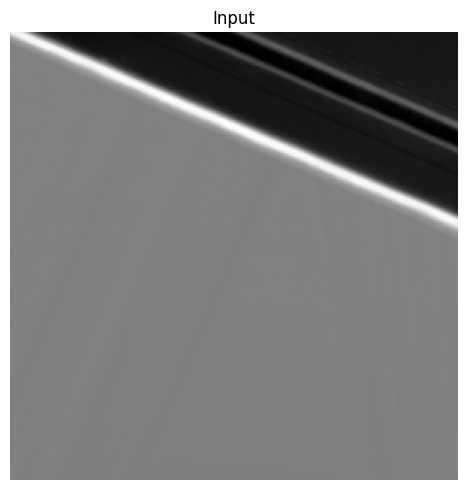

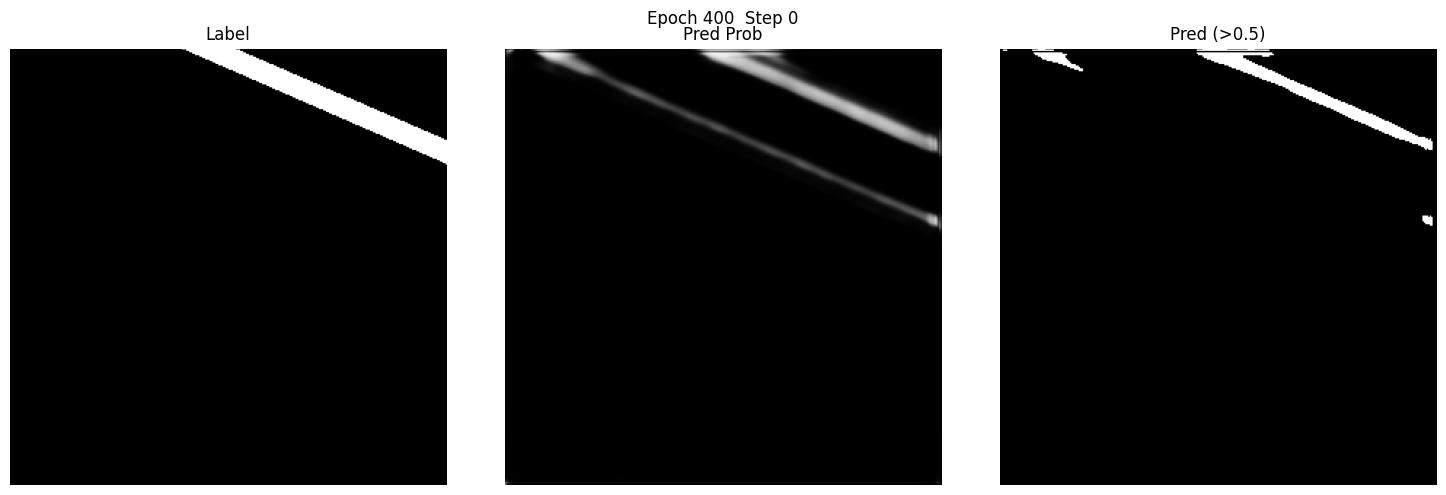

Epoch 420/700 - loss: 0.0121
lr: 1.1140191854763587e-07


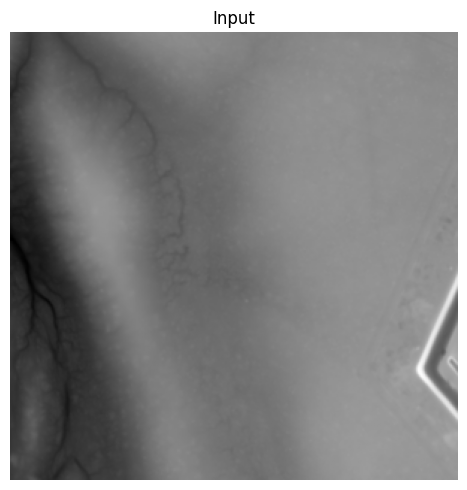

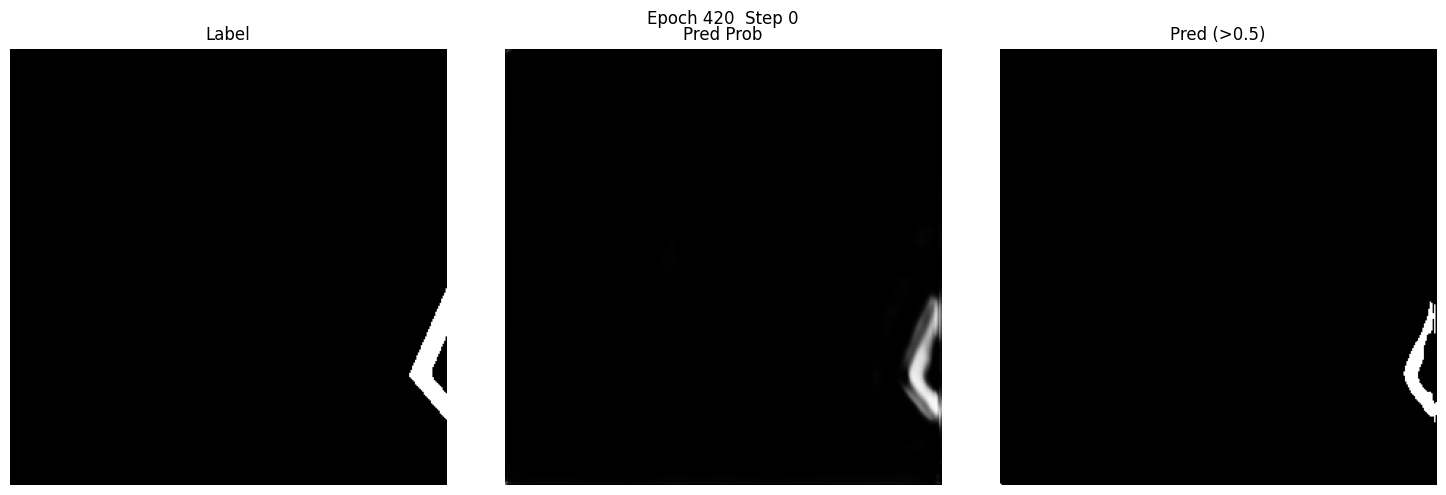

Epoch 440/700 - loss: 0.0861
lr: 2.987972752260887e-08


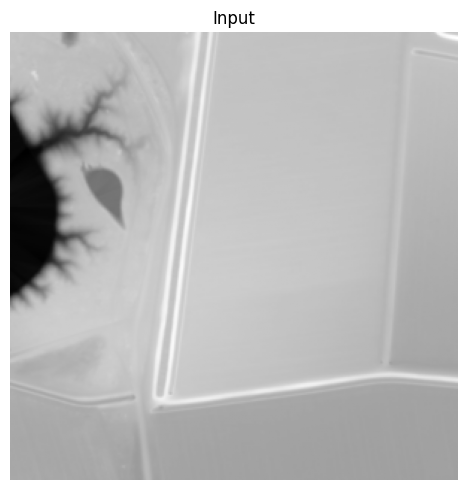

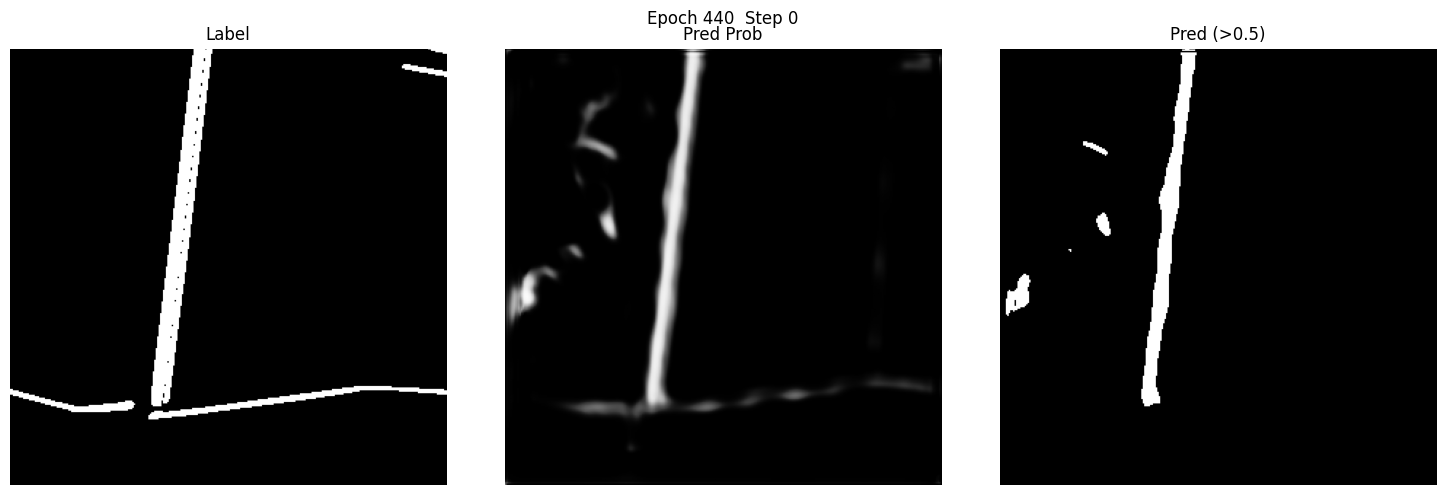

Epoch 460/700 - loss: 0.0987
lr: 7.058916080099494e-09


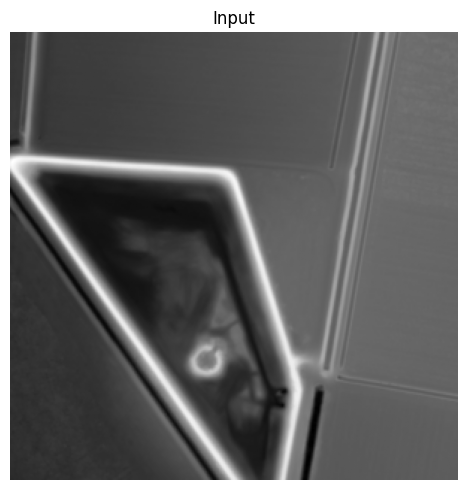

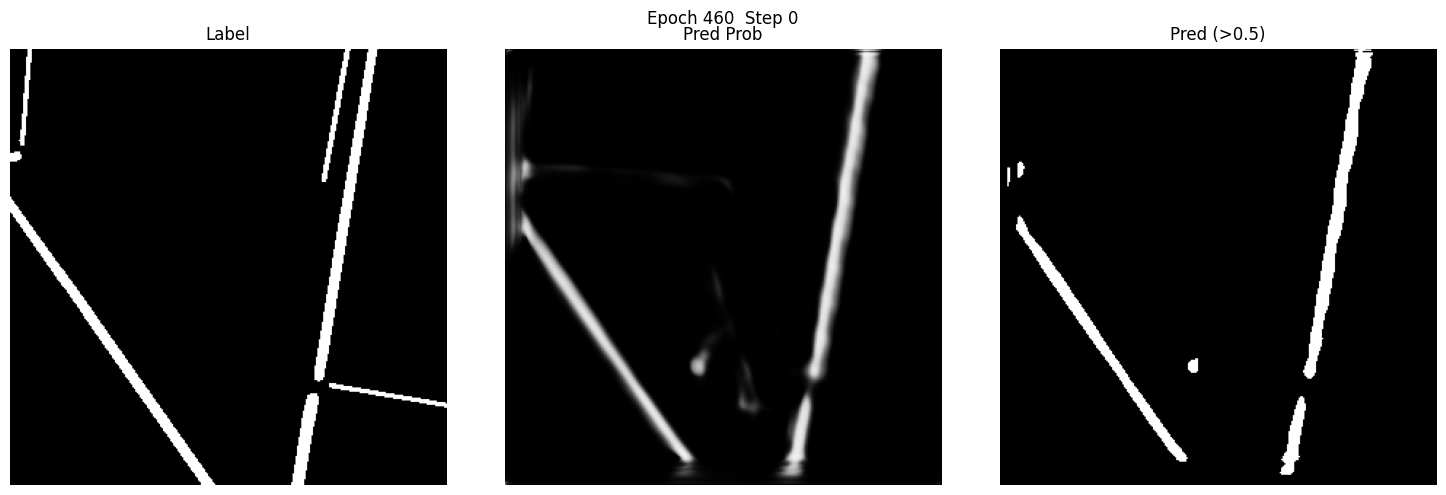

Epoch 480/700 - loss: 0.0280
lr: 1.4788153235684997e-09


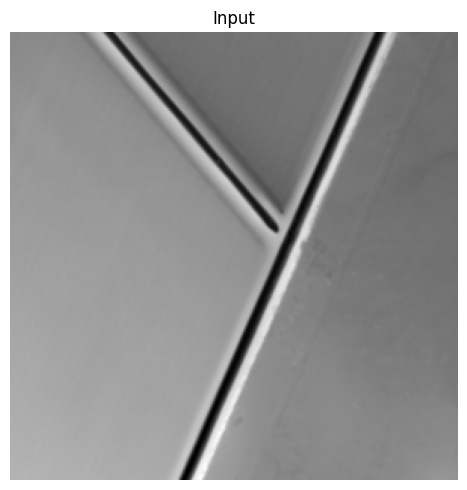

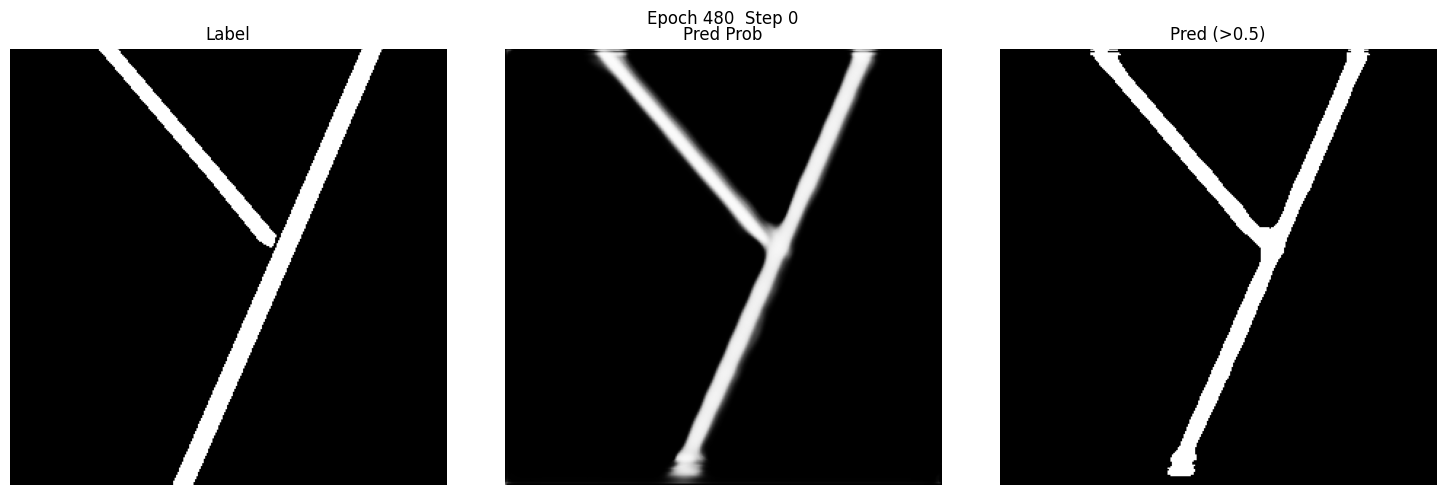

Epoch 500/700 - loss: 0.0144
lr: 2.7199347188995075e-10


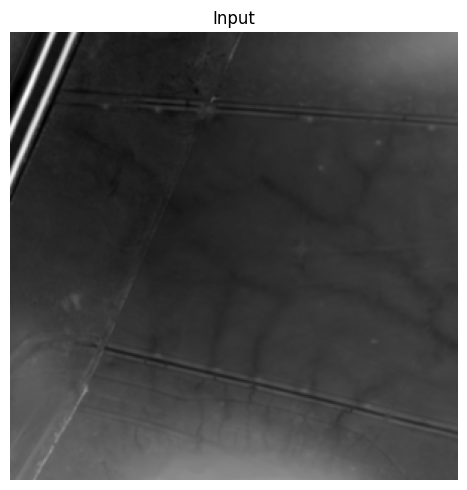

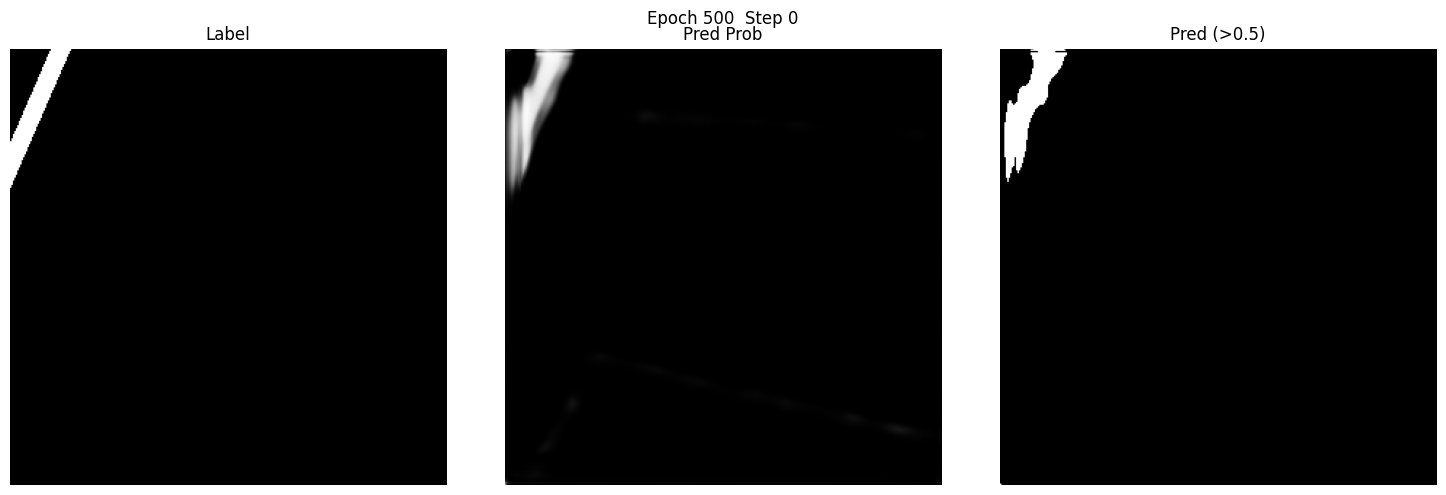

Epoch 520/700 - loss: 0.1247
lr: 4.344739987686733e-11


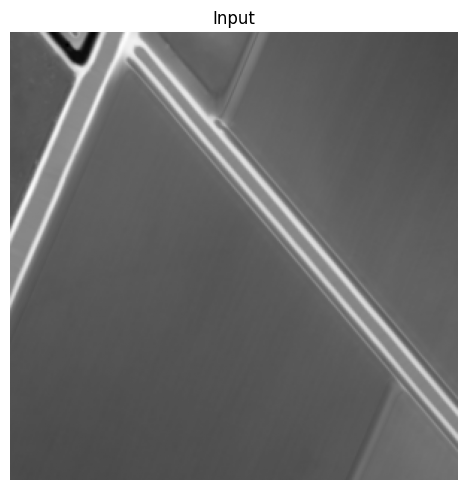

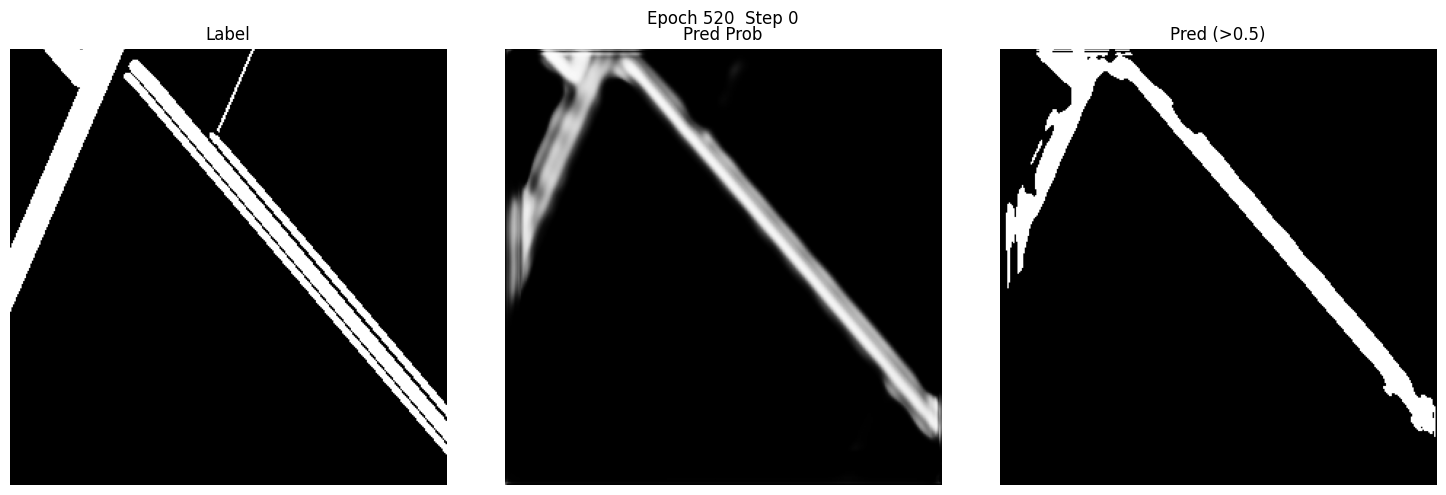

Epoch 540/700 - loss: 0.0452
lr: 5.957032482682384e-12


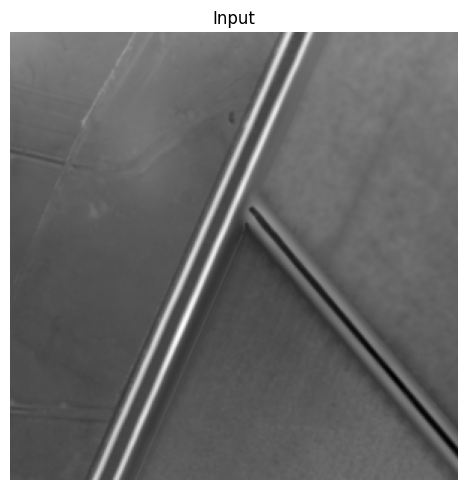

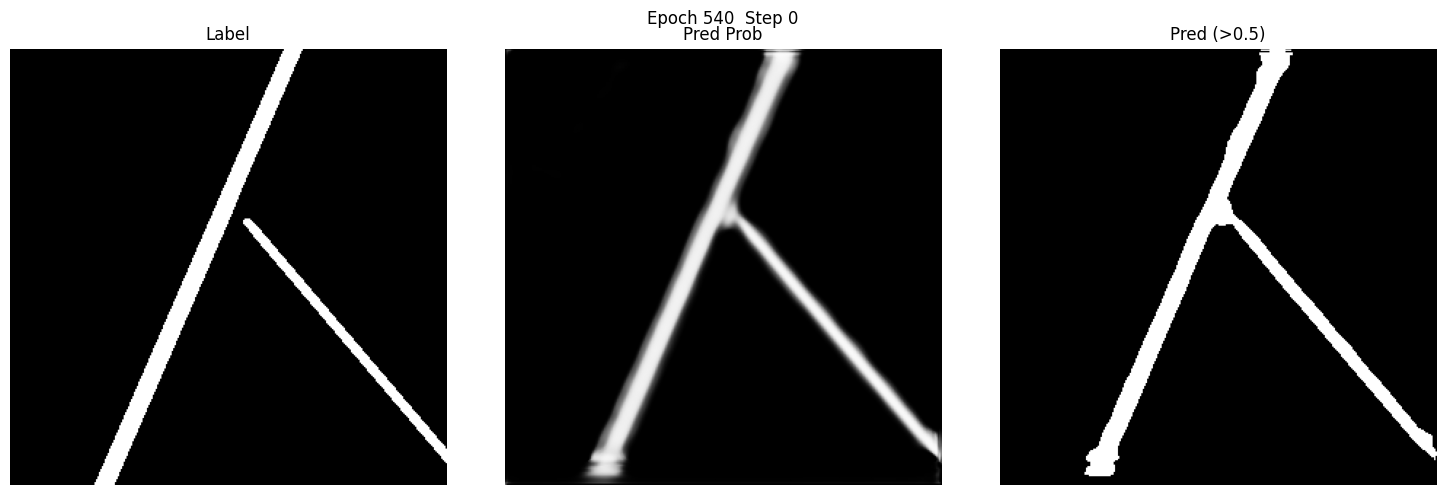

Epoch 560/700 - loss: 0.0154
lr: 6.922012753321683e-13


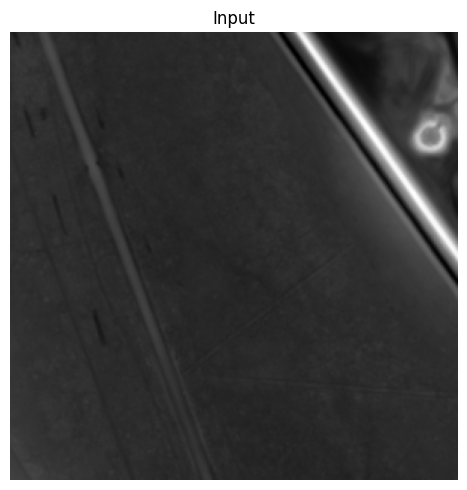

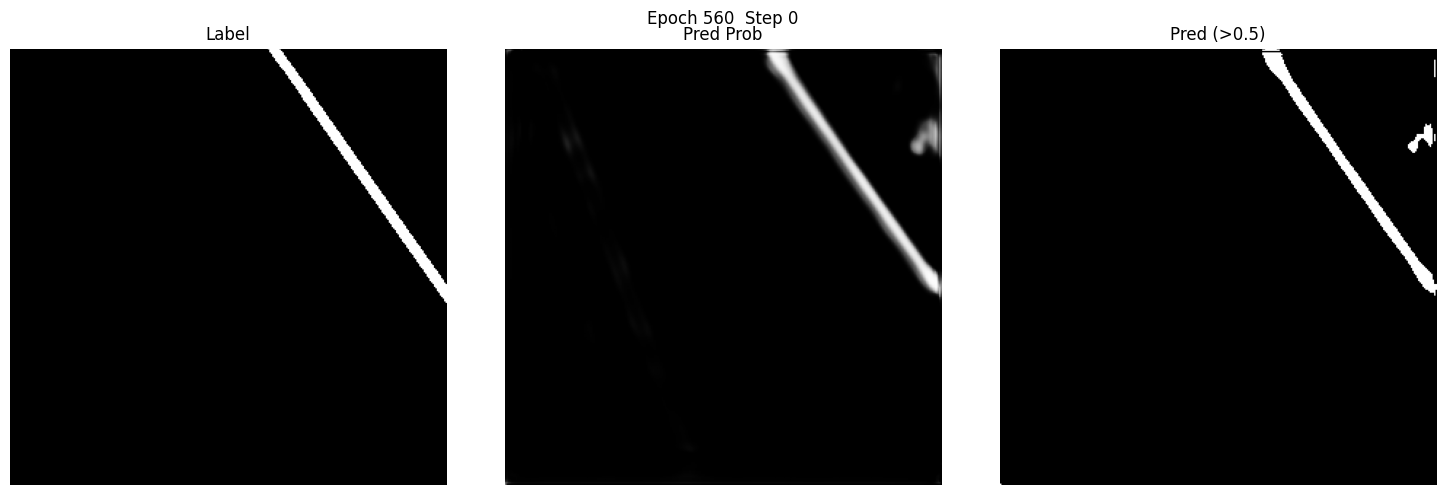

Epoch 580/700 - loss: 0.0439
lr: 6.723360113819357e-14


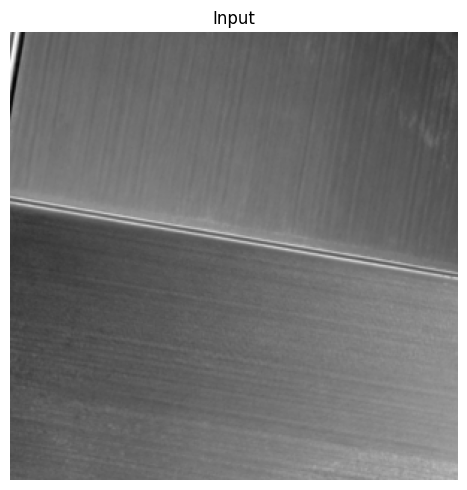

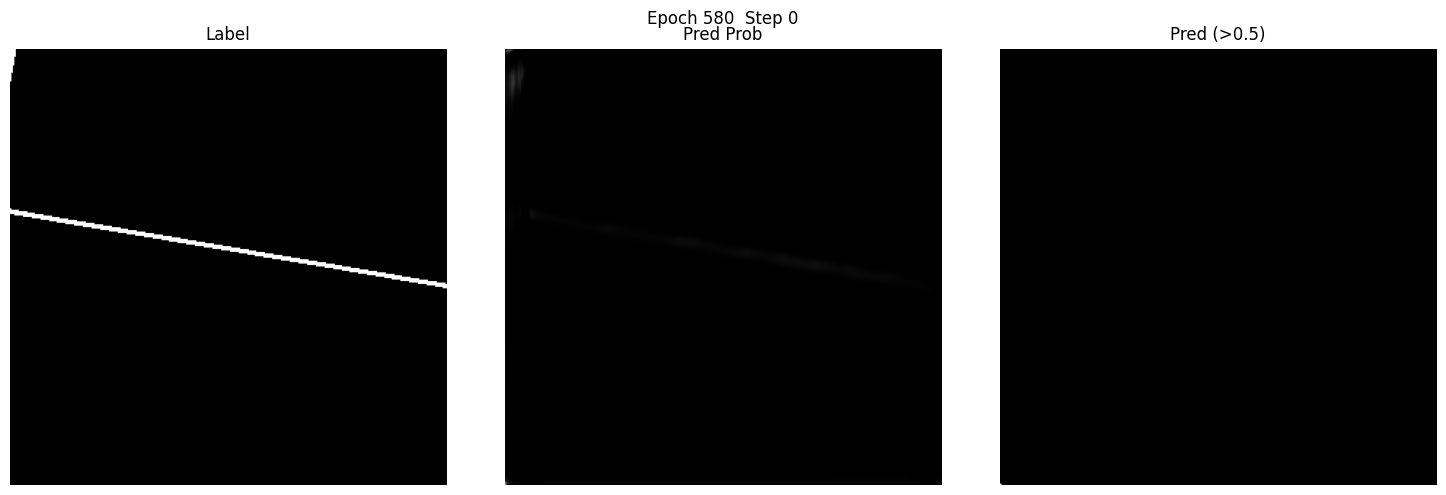

Epoch 600/700 - loss: 0.0747
lr: 5.3778515348655475e-15


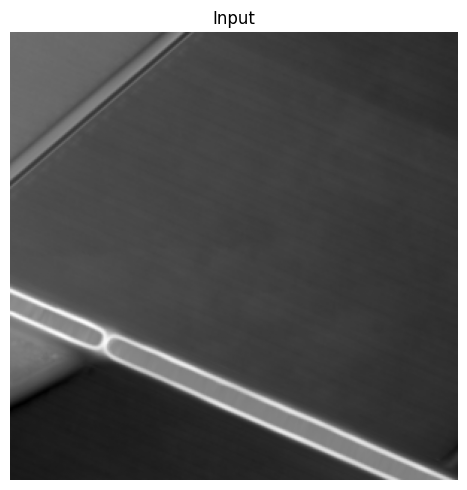

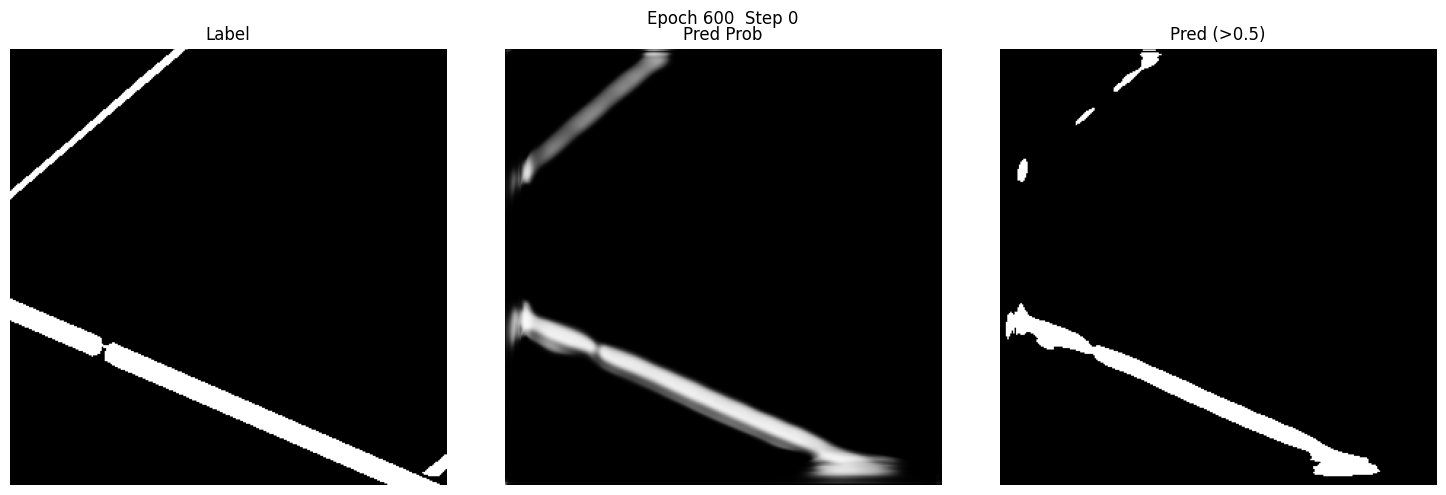

Epoch 620/700 - loss: 0.0688
lr: 3.485593239080628e-16


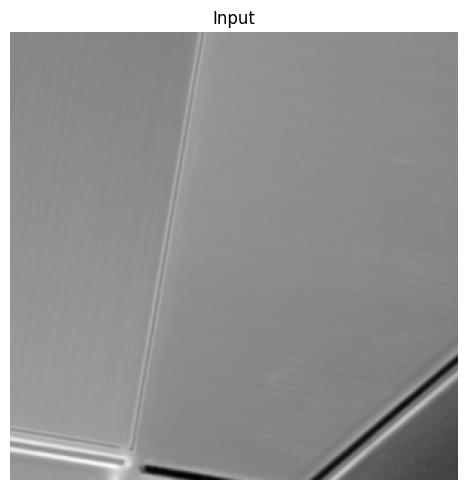

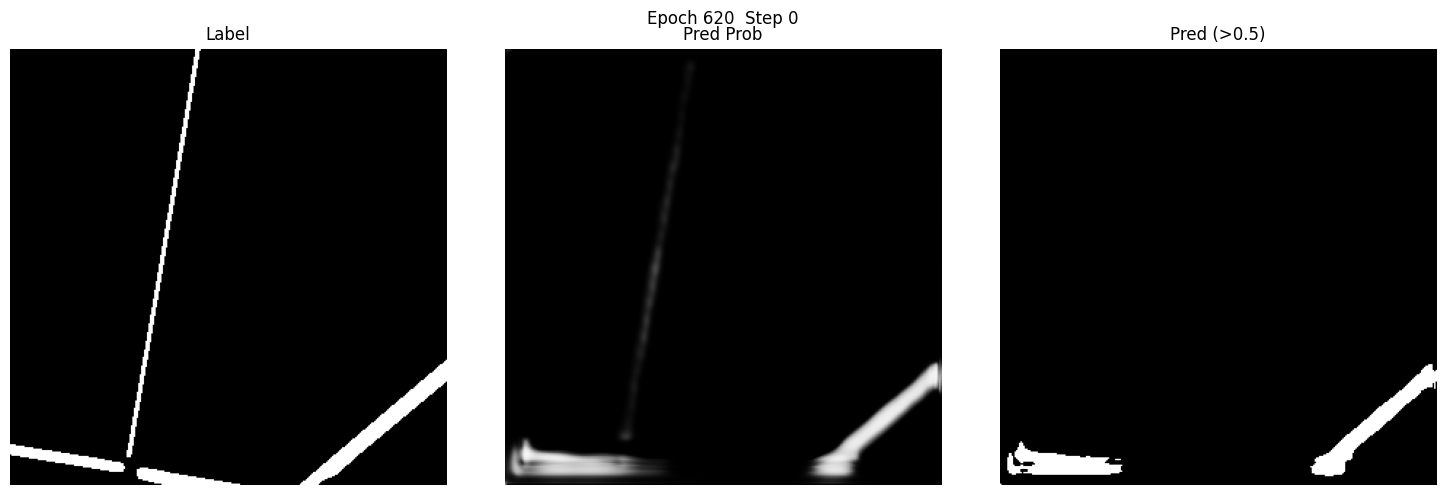

Epoch 640/700 - loss: 0.0393
lr: 1.7987971928442842e-17


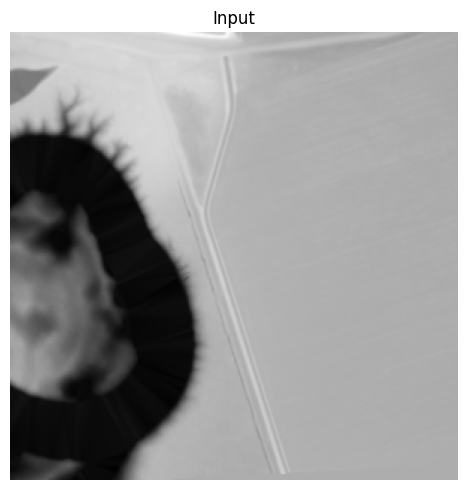

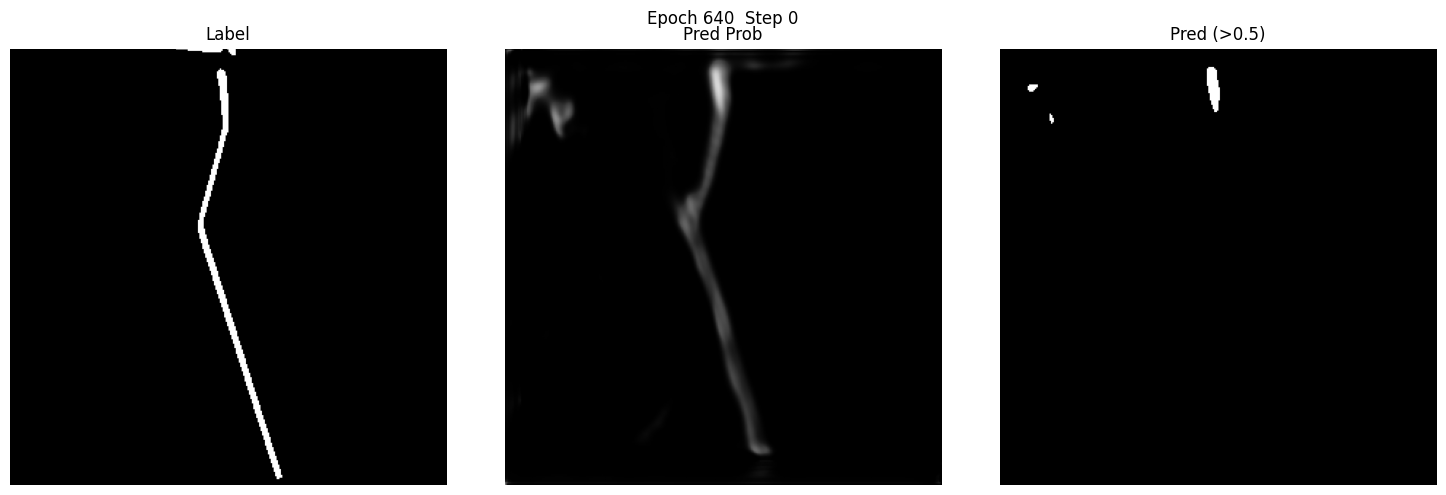

Epoch 660/700 - loss: 0.0317
lr: 7.252435379998826e-19


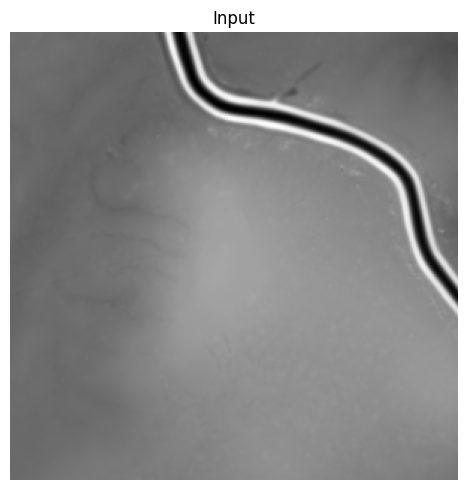

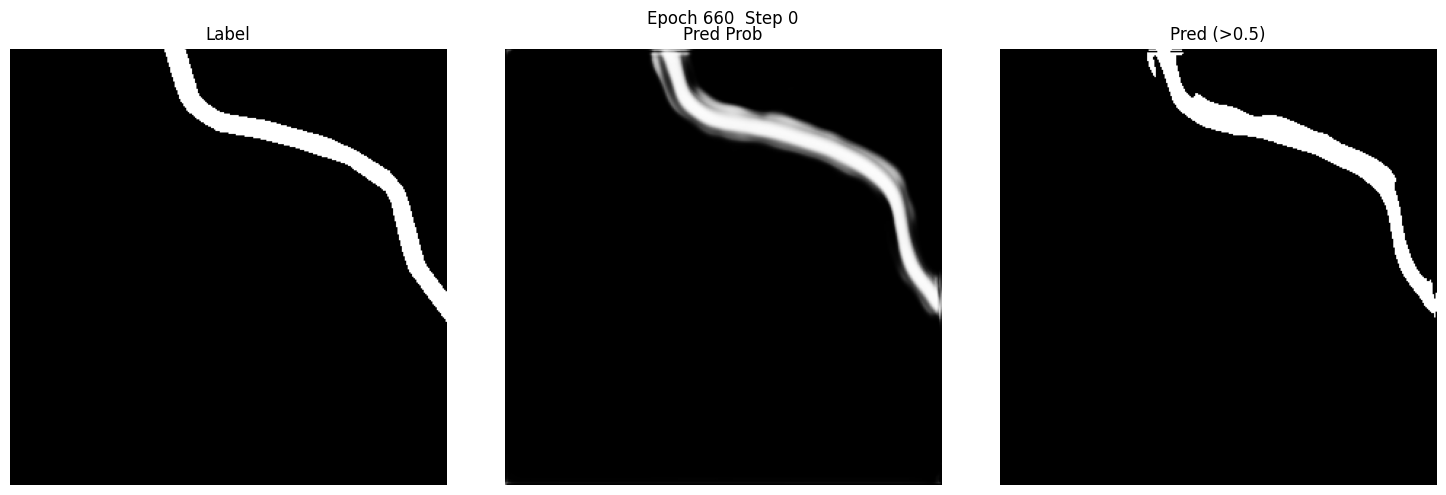

Epoch 680/700 - loss: 0.1607
lr: 2.237968353693398e-20


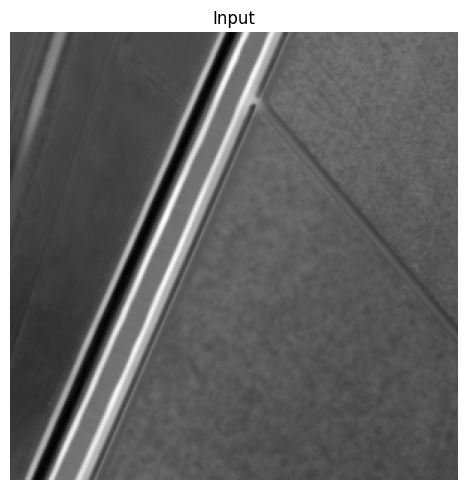

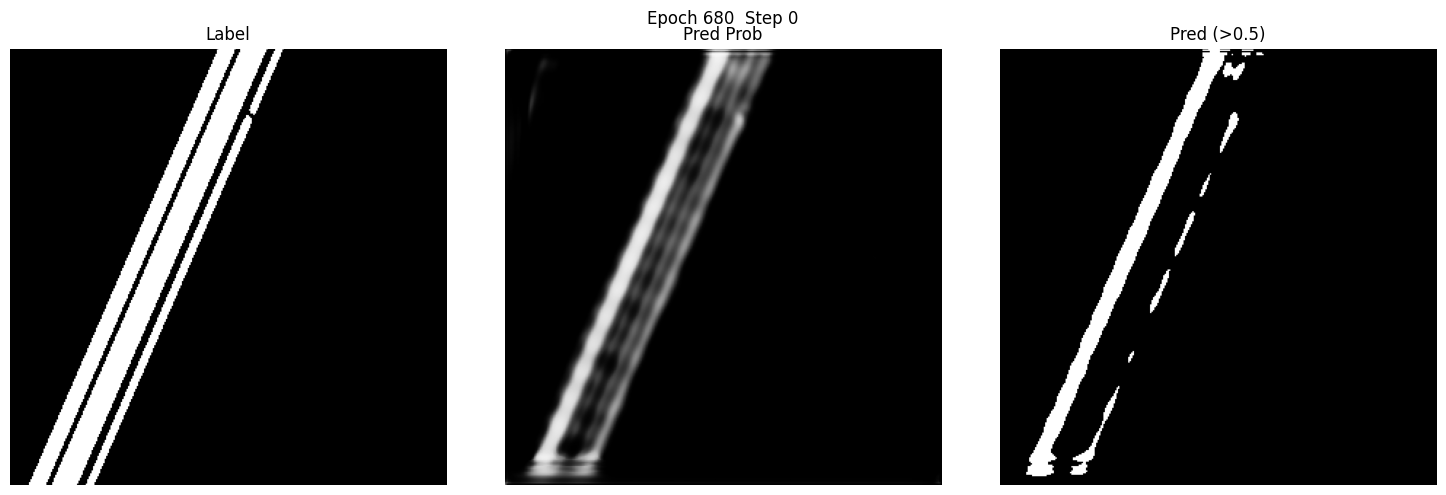

Epoch 700/700 - loss: 0.0117
lr: 5.169174187705717e-22


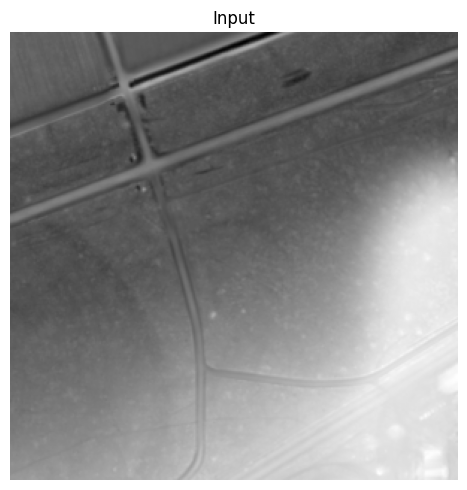

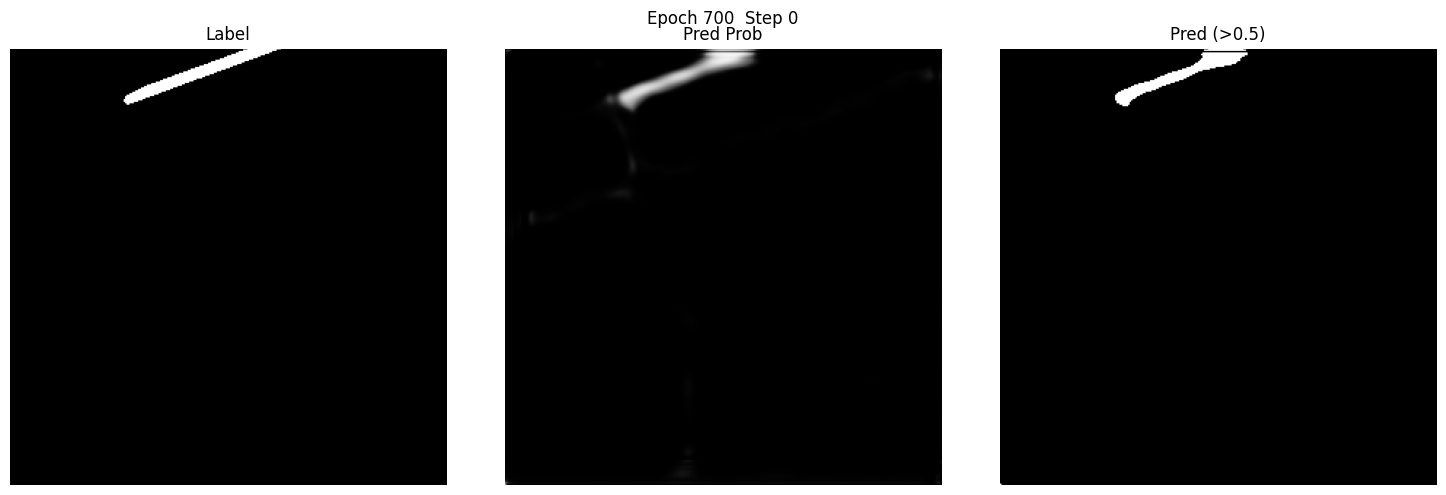

In [50]:
model = train_model(combined_data, 
                    num_epochs=700, 
                    viz_every = 20, 
                    features=[16,32,64], 
                    lr=5e-2, 
                    lr_decay=1.0002, 
                    pos_bias=1)

In [ ]:
break code here

In [54]:
standardise_dataset("TEST_SET", force=True, target_files=["COMBINED.tif"])
test_model_visual(model, "TEST_DATASET")

RasterioIOError: data\TEST_SET\POSITIVE_STANDARDISED.tif: No such file or directory

In [ ]:
BREAKCODE WITH THIS LINE

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleUnet(in_channels=1, out_channels=1, features = [8, 16, 32, 64]).to(device)

pos_weight = torch.tensor([1.0], device=device)  # try 5, 10, 20, 50
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

lr = 1e-3

def show_sample(x, y, logits, epoch: int, step: int = 0, threshold: float = 0.5):
    """
    x:      (1,1,H,W) float
    y:      (1,1,H,W) float (0/1)
    logits: (1,1,H,W) float
    """
    x0 = x[0, 0].detach().cpu()
    y0 = y[0, 0].detach().cpu()
    p0 = torch.sigmoid(logits[0, 0]).detach().cpu()
    pred0 = (p0 > threshold).float()

    fig, axes = plt.subplots(1, 4, figsize=(14, 4))
    axes[0].imshow(x0, cmap="gray")
    axes[0].set_title("Input")
    axes[1].imshow(y0, cmap="gray", vmin=0, vmax=1)
    axes[1].set_title("Label")
    axes[2].imshow(p0, cmap="gray", vmin=0, vmax=1)
    axes[2].set_title("Pred prob (sigmoid)")
    axes[3].imshow(pred0, cmap="gray", vmin=0, vmax=1)
    axes[3].set_title(f"Pred mask > {threshold}")

    for ax in axes:
        ax.axis("off")
    plt.suptitle(f"Epoch {epoch}  Step {step}")
    plt.tight_layout()
    plt.show()

num_epochs = 1000
viz_every = 50        # visualize every N epochs
viz_steps = 1           # visualize first batch only (set >1 to see more)

for epoch in range(1, num_epochs + 1):
    model.train()
    epoch_loss = 0.0

    for step, (this_data, labels) in enumerate(data_old.segmented_data_with_labels.get_hacky_fold_iterable()):
        # Make (B,C,H,W) with B=C=1
        this_data = this_data.unsqueeze(0).unsqueeze(0).to(device).float()
        labels = labels.unsqueeze(0).unsqueeze(0).to(device).float()

        logits = model(this_data)
        #print(labels)
        loss = criterion(logits, labels)
        lr = lr** 1.0001
        #print(f"lr = {lr}")
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * this_data.size(0)

        # Visualize during training (cheap, but switch to eval/no_grad)
        if (epoch % viz_every == 0) and (step < viz_steps):
            model.eval()
            with torch.no_grad():
                v_logits = model(this_data)
            show_sample(this_data, labels, v_logits, epoch=epoch, step=step)
            model.train()

    epoch_loss /= len(data_old.data_with_labels.data)
    #print(f"Epoch {epoch}/{num_epochs} - loss: {epoch_loss:.4f}")
